<a href="https://colab.research.google.com/github/mklock88/Redistricting_Workshop_MAA_TX_2022/blob/main/Matt_Lockard_copy_of_An_SMU_Gerrychain_Tutorial_for_Detecting_Gerrymandering_11_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMU DCII RESEARCH CLUSTER ON POLITICAL DECISION MAKING AND MATH FOR UNBIASED MAPS TX
# November 12, 2022
# A Gerrychain Tutorial: Tools for Detecting Gerrymandering

---

## Event Information

### Time, Date, & Location
*9:00am - 12:00pm*  
*November 12*  
*Visualization Lab*  
*Ford Hall*
*SMU main campus*  
*Dallas, TX*  


**Link to this Jupyter Notebook: https://colab.research.google.com/drive/1bX29BqwfwDJd5YRQ1zop3AcjLs-h3kfl?usp=sharing

Zoom link: 

GitHub Repo: 

Video: 

### Contributors

Workshop Facilitators:
- Dr. Andrea Barreiro<sup>3</sup>
- Dr. Scott Cook<sup>4</sup>
- Dr. Matt Lockard<sup>3</sup>
- Dr. Scott Norris<sup>3</sup>
- Dr. Dustin Potter<sup>1</sup>
- Dr. Brandilyn Stigler<sup>3</sup>

Part I notebook contributors:
- Dr. Scott Cook<sup>4</sup>
- Diana Dinh-Andrus<sup>3</sup>
- Dr. Will Hager<sup>5</sup>
- Anthony Pizzimenti<sup>2</sup>
- Casey Sutton<sup>4</sup>
- Maria Tovar<sup>4</sup>
- Preston Ward<sup>4</sup>
- Dr. Dustin Potter<sup>4</sup>

Special Thanks:
- Metric Geometry & Gerrymandering Group
    - Dr. Moon Duchin<sup>6</sup>
- Math For Unbiased Maps Texas
    - Robert Meyers
    
    


<sup>1</sup>Collin College, <sup>2</sup>Iowa State Univ, <sup>3</sup>Southern Methodist Univ, <sup>4</sup>Tarleton State Univ, <sup>5</sup>Texas Lutheran State Univ, <sup>6</sup>Tufts Univ

### Workshop Agenda

Ensemble analysis of electorial districting plans consists of several steps:
1. Generate ensemble - Feed this dataset into tools like GerryChain to generate an ensemble of districting plans
2. Analyze - Statistically compare a proposed/enacted plan against the ensemble

This workshop assumes the necessary data has already been retrieved, preprocessed, and that the geographic, demographic, and electoral data has been assembled into a single dataset. Though this is a big assumption as the data-processing is a large undertaking, steps 1 & 2 are more interesting and satisfying mathematically and politically.  

If you are interested in how the data was collected and merged into a single datafram, you can work through Scott Cook's workbook "[Getting and Preparing Data.](//https://github.com/drscook/Redistricting_Workshop_MAA_TX_2022/blob/main/Part2_MAA_TX22_Redistricting_Workshop.ipynb)"

### Applications

 
  - Google Colab - What you are seeing right now.  Free, cloud based Python distribution from Google.  Like Google docs for Python.  Side note - allows you to attach GPU or TPU devices too for parallel computing (though we won't use that in this workshop)
  - Pandas - Data analysis package for Python.  We make use of its dataframes in this talk.
    - [Pandas Documentation](https://pandas.pydata.org/docs/)
  - GeoPandas - A Python package that allows the addition of geographic information to Pandas dataframes.
    - [Geopandas Documentation](https://geopandas.org/en/stable/docs.html)
  - Networkx - A Python package that creates, edits, and analyzes graphs.
    - [Networkx Documentation](https://networkx.github.io/)  
  - GerryChain - Python package to implement mathematical tools for gerrymandering.  Specifically designed to run Markov Chain Monte Carlo (MCMC) methods with a wide range of metrics.  Developed during the summer 2018 [Voting Rights Data Institute](https://sites.tufts.edu/vrdi/).
    - [GerryChain Documentation](https://gerrychain.readthedocs.io/en/latest/)
  -GerryChainJulia - Gerrychain in a Julia package.  The Julia implementation of Gerrychain tends to run faster than the Python implementation.
    - [GerryChainJulia Documentation](https://mggg.github.io/GerryChainJulia/stable/) 
  


---
## 0 - Before You Start

**Make a personal copy of this Colab notebook in your Google Drive so you can add, edit, take notes, comment, execute code, etc.  File → Save a copy in Drive**
 

---
# 1 - Install Gerrychain

In the following section we install the GerryChain library and import the functions we will need to run MCMC methods.  This package will create a collection of partitions against which we can compare real world partitions.

In [1]:
#  This takes 3 minutes. You will receive an error message "Your session crashed 
#  for an unknown reason."  This happens because condacolab restarts the kernel 
#  of this worksheet.   

# installs condacolab, which allows installation of conda
! pip install -q condacolab  

# installs conda, which allows installation of mamba
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
# try this first - its much faster if it works
! mamba install -q -y -c conda-forge gerrychain geopandas

# if that fails, use the slower
# ! conda install -q -y -c conda-forge gerrychain geopandas

from IPython import get_ipython
get_ipython().kernel.do_shutdown(True)


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.25.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████



{'status': 'ok', 'restart': True}

---
# 2 - Create GeoDataFrame from Imported Data

## a - Download a Data File and Load It Into a GeoDataFrame

**Download description HERE**

In [52]:
#  This takes a few seconds.

#  Installs a downloader for Google Drive files.
!pip install gdown 

#  Downloads a .zip file from Google Drive.  Saves to Colab's local disk.  This 
#  will be lost when the runtime is restarted.  If you wish to keep it, download 
#  from the 'Files' tab on the left edge of the screen.
#!gdown "https://drive.google.com/file/d/1FDoklVhjdUIGHsw0QZbqs5BegwrUAAM0/view?usp=sharing" -O "VTD-Data.zip"  #
!gdown "1FDoklVhjdUIGHsw0QZbqs5BegwrUAAM0" -O "VTD-Data.zip"  #

#  Unzips the downloaded file.
#  !unzip "/content/VTD-Data.zip"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1FDoklVhjdUIGHsw0QZbqs5BegwrUAAM0
To: /content/VTD-Data.zip
100% 241M/241M [00:01<00:00, 206MB/s]


In [53]:
!unzip "/content/VTD-Data.zip"

Archive:  /content/VTD-Data.zip
replace __MACOSX/._Texas_Final_Redistrict_21? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Texas_Final_Redistrict_21/graph_TX_2020_cntyvtd_TXHD_2317.gpickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/Texas_Final_Redistrict_21/._graph_TX_2020_cntyvtd_TXHD_2317.gpickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Texas_Final_Redistrict_21/adj_TX_2020_cntyvtd_USCD_2175.gpickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/Texas_Final_Redistrict_21/._adj_TX_2020_cntyvtd_USCD_2175.gpickle? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Texas_Final_Redistrict_21/Untitled.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Texas_Final_Redistrict_21/nodes_TX_2020_cntyvtd_TXHD_2317.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/Texas_Final_Redistrict_21/._nodes_TX_2020_cntyvtd_TXHD_2317.parquet? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Note that GeoPandas can create GeoDataFrames from a variety of different filetypes. See the [documentation](https://geopandas.org/en/stable/docs/user_guide/io.html) for more details.

First we read in the parquet file as a pandas dataframe. 



In [54]:
import pandas

USCD = pandas.read_parquet("Texas_Final_Redistrict_21/nodes_TX_2020_cntyvtd_USCD_2175.parquet")
# TXSN = pandas.read_parquet("Texas_Final_Redistrict_21/nodes_TX_2020_cntyvtd_TXSN_2174.parquet")
# TXHD = pandas.read_parquet("Texas_Final_Redistrict_21/nodes_TX_2020_cntyvtd_TXHD_2317.parquet")

Then we use wkt to format the string in the polygon column into a geometry formatting and then format entire dataframe to geopandas.

In [55]:
from shapely import wkt
import geopandas as gpd

USCD["geometry"] = USCD["polygon"].apply(wkt.loads)
gUSCD = gpd.GeoDataFrame(USCD, geometry="geometry")
# TXSN["polygon"] = TXSN["polygon"].apply(wkt.loads)
# gTXSN = gpd.GeoDataFrame(TXSN, geometry="polygon")
# TXHD["polygon"] = TXHD["polygon"].apply(wkt.loads)
# gTXHD = gpd.GeoDataFrame(TXHD, geometry="polygon")

## b - Check the GeoDataFrame
Let's take a look at it in table form.



In [56]:
gUSCD

,node_geoids,geoid,county,cntyvtd,tabblock,bg,tract,cnty,cd,sldu,...,USSen_2014_R_Cornyn_general,USSen_2018_D_ORourke_general,USSen_2018_L_Dikeman_general,USSen_2018_R_Cruz_general,USSen_2020_D_Hegar_general,USSen_2020_G_Collins_general,USSen_2020_L_McKennon_general,USSen_2020_R_Cornyn_general,aland,geometry
0,"0019508002001,0019509022083,0019508003022,0019...",001,Anderson,001000015,480019508002001,480019508002,48001950800,001,05,003,...,7791.0,3307.0,94.0,11335.0,3792.0,88.0,249.0,14943.0,2.752165e+09,"POLYGON ((-95.70635 31.51224, -95.70636 31.512..."
1,"0039504002016,0039504002284,0039501001357,0039...",003,Andrews,003000003,480039504002016,480039504002,48003950400,003,11,031,...,1943.0,776.0,17.0,3338.0,779.0,20.0,107.0,4888.0,3.886850e+09,"POLYGON ((-102.64121 32.08684, -102.64130 32.0..."
2,"0050007003039,0050010014014,0050006002025,0050...",005,Angelina,005000020,480050007003039,480050007003,48005000700,005,01,003,...,12866.0,7130.0,153.0,19166.0,8771.0,161.0,461.0,24962.0,2.066461e+09,"POLYGON ((-94.46011 31.03287, -94.46012 31.032..."
3,"0079501012099,0079503012000,0079900000006,0079...",007,Aransas,007000001,480079501012099,480079501012,48007950101,007,27,018,...,4506.0,2247.0,56.0,6677.0,2729.0,68.0,178.0,9189.0,6.528568e+08,"POLYGON ((-97.06530 27.85183, -97.06530 27.851..."
4,"0090203001118,0090202001224,0090202002040,0090...",009,Archer,009000003,480090203001118,480090203001,48009020300,009,13,030,...,2202.0,376.0,18.0,3208.0,467.0,14.0,65.0,4178.0,2.339508e+09,"POLYGON ((-98.62919 33.39556, -98.62927 33.395..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980,"4999507001003,4999503042042,4999503031055,4999...",499,Wood,4990001-1,484999507001003,484999507001,48499950700,499,05,001,...,9564.0,2635.0,118.0,13987.0,3318.0,87.0,306.0,18757.0,1.671172e+09,"POLYGON ((-95.17821 32.54995, -95.17821 32.549..."
5981,"5019502005038,5019502005083,5019502002006,5019...",501,Yoakum,501000101,485019502005038,485019502005,48501950200,501,19,031,...,1017.0,335.0,10.0,1558.0,387.0,21.0,38.0,2153.0,2.071252e+09,"POLYGON ((-102.84524 32.95870, -102.84525 32.9..."
5982,"5039504022103,5039502001199,5039504021211,5039...",503,Young,503000006,485039504022103,485039504022,48503950402,503,19,030,...,4431.0,821.0,41.0,5543.0,967.0,26.0,120.0,6996.0,2.368540e+09,"POLYGON ((-98.69046 33.39567, -98.69035 33.395..."
5983,"5059504024188,5059504022140,5059504021071,5059...",505,Zapata,505000004,485059504024188,485059504024,48505950402,505,28,021,...,313.0,1392.0,10.0,821.0,1821.0,50.0,52.0,1454.0,2.585876e+09,"POLYGON ((-99.27259 26.84811, -99.27487 26.850..."


Let's plot the GeoDataFrame's geometries. You should see Texas after running the cell.



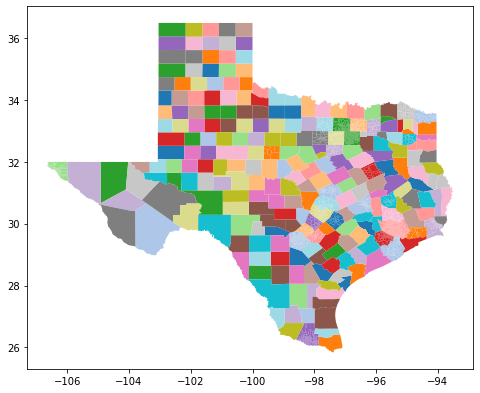

In [57]:
gUSCD.plot(column="county", figsize = (8,8), cmap = 'tab20')


### Optional - Using GeoDataFrames

There are many ways to read and view the data in our GeoDataFrame.




#### Quick Overviews.

We can get a quick look at the top or bottom of the table.


In [58]:
gUSCD.head(3)

,node_geoids,geoid,county,cntyvtd,tabblock,bg,tract,cnty,cd,sldu,...,USSen_2014_R_Cornyn_general,USSen_2018_D_ORourke_general,USSen_2018_L_Dikeman_general,USSen_2018_R_Cruz_general,USSen_2020_D_Hegar_general,USSen_2020_G_Collins_general,USSen_2020_L_McKennon_general,USSen_2020_R_Cornyn_general,aland,geometry
0,"0019508002001,0019509022083,0019508003022,0019...",001,Anderson,001000015,480019508002001,480019508002,48001950800,001,05,003,...,7791.0,3307.0,94.0,11335.0,3792.0,88.0,249.0,14943.0,2.752165e+09,"POLYGON ((-95.70635 31.51224, -95.70636 31.512..."
1,"0039504002016,0039504002284,0039501001357,0039...",003,Andrews,003000003,480039504002016,480039504002,48003950400,003,11,031,...,1943.0,776.0,17.0,3338.0,779.0,20.0,107.0,4888.0,3.886850e+09,"POLYGON ((-102.64121 32.08684, -102.64130 32.0..."
2,"0050007003039,0050010014014,0050006002025,0050...",005,Angelina,005000020,480050007003039,480050007003,48005000700,005,01,003,...,12866.0,7130.0,153.0,19166.0,8771.0,161.0,461.0,24962.0,2.066461e+09,"POLYGON ((-94.46011 31.03287, -94.46012 31.032..."


In [59]:
gUSCD.tail(4)

,node_geoids,geoid,county,cntyvtd,tabblock,bg,tract,cnty,cd,sldu,...,USSen_2014_R_Cornyn_general,USSen_2018_D_ORourke_general,USSen_2018_L_Dikeman_general,USSen_2018_R_Cruz_general,USSen_2020_D_Hegar_general,USSen_2020_G_Collins_general,USSen_2020_L_McKennon_general,USSen_2020_R_Cornyn_general,aland,geometry
5981,"5019502005038,5019502005083,5019502002006,5019...",501,Yoakum,501000101,485019502005038,485019502005,48501950200,501,19,031,...,1017.0,335.0,10.0,1558.0,387.0,21.0,38.0,2153.0,2.071252e+09,"POLYGON ((-102.84524 32.95870, -102.84525 32.9..."
5982,"5039504022103,5039502001199,5039504021211,5039...",503,Young,503000006,485039504022103,485039504022,48503950402,503,19,030,...,4431.0,821.0,41.0,5543.0,967.0,26.0,120.0,6996.0,2.368540e+09,"POLYGON ((-98.69046 33.39567, -98.69035 33.395..."
5983,"5059504024188,5059504022140,5059504021071,5059...",505,Zapata,505000004,485059504024188,485059504024,48505950402,505,28,021,...,313.0,1392.0,10.0,821.0,1821.0,50.0,52.0,1454.0,2.585876e+09,"POLYGON ((-99.27259 26.84811, -99.27487 26.850..."
5984,"5079502001042,5079503011264,5079503011063,5079...",507,Zavala,507000004,485079502001042,485079502001,48507950200,507,23,019,...,322.0,2313.0,15.0,589.0,2633.0,57.0,72.0,1232.0,3.360269e+09,"POLYGON ((-99.78101 28.64378, -99.78186 28.643..."


#### Calling Entries from DataFrames.

We can select an entry using its index and column name...

In [60]:
gUSCD.loc[4213,'county']

'Hidalgo'

In [61]:
gUSCD.loc[4213,'polygon']

'POLYGON ((-98.1753708427718 26.2475800640268, -98.1753756117197 26.247580986032, -98.175380259047 26.2475823324845, -98.1753847399375 26.2475840904001, -98.1753890111796 26.2475862428261, -98.17539303158399 26.2475887690057, -98.17539676238 26.247591644578, -98.1754001675897 26.2475948418122, -98.17540321437509 26.2475983298761, -98.17540587335461 26.2476020751327, -98.1754081188863 26.2476060414645, -98.17540992931551 26.2476101906225, -98.17541128718339 26.2476144825944, -98.1754121793951 26.2476188759906, -98.17541259734681 26.2476233284437, -98.1754125370078 26.2476277970163, -98.17541199896 26.2476322386161, -98.1754109883918 26.2476366104105, -98.175370988463 26.2477756104241, -98.17536928842959 26.2477804180363, -98.1753425088028 26.2478438957474, -98.17528877553571 26.2479812142777, -98.175179834863 26.2482660595424, -98.1751797111822 26.2482663791095, -98.175123711249 26.2484093791281, -98.1751221159784 26.2484129651231, -98.1749471161215 26.2487629651791, -98.1749463541509 2

...or by row and column number. Note that we start counting at zero.

In [62]:
gUSCD.iloc[4213,2]

'Hidalgo'

In [63]:
gUSCD.iloc[4213,11]

'POLYGON ((-98.1753708427718 26.2475800640268, -98.1753756117197 26.247580986032, -98.175380259047 26.2475823324845, -98.1753847399375 26.2475840904001, -98.1753890111796 26.2475862428261, -98.17539303158399 26.2475887690057, -98.17539676238 26.247591644578, -98.1754001675897 26.2475948418122, -98.17540321437509 26.2475983298761, -98.17540587335461 26.2476020751327, -98.1754081188863 26.2476060414645, -98.17540992931551 26.2476101906225, -98.17541128718339 26.2476144825944, -98.1754121793951 26.2476188759906, -98.17541259734681 26.2476233284437, -98.1754125370078 26.2476277970163, -98.17541199896 26.2476322386161, -98.1754109883918 26.2476366104105, -98.175370988463 26.2477756104241, -98.17536928842959 26.2477804180363, -98.1753425088028 26.2478438957474, -98.17528877553571 26.2479812142777, -98.175179834863 26.2482660595424, -98.1751797111822 26.2482663791095, -98.175123711249 26.2484093791281, -98.1751221159784 26.2484129651231, -98.1749471161215 26.2487629651791, -98.1749463541509 2

#### Retrieving Data from Columns.

In [64]:
gUSCD['county']

0       Anderson
1        Andrews
2       Angelina
3        Aransas
4         Archer
          ...   
5980        Wood
5981      Yoakum
5982       Young
5983      Zapata
5984      Zavala
Name: county, Length: 5985, dtype: object

In [65]:
gUSCD['total_pop']

0       57922
1       18610
2       86395
3       23830
4        8560
        ...  
5980    44843
5981     7694
5982    17867
5983    13889
5984     9670
Name: total_pop, Length: 5985, dtype: int64

#### Retrieving Data from Rows.

In [66]:
gUSCD.loc[3]

node_geoids                      0079501012099,0079503012000,0079900000006,0079...
geoid                                                                          007
county                                                                     Aransas
cntyvtd                                                                  007000001
tabblock                                                           480079501012099
                                                       ...                        
USSen_2020_G_Collins_general                                                  68.0
USSen_2020_L_McKennon_general                                                178.0
USSen_2020_R_Cornyn_general                                                 9189.0
aland                                                                  652856780.0
geometry                         POLYGON ((-97.0652985815176 27.8518316270316, ...
Name: 3, Length: 864, dtype: object

In [67]:
gUSCD.loc[8]

node_geoids                      0179501022167,0179501022543,0179501011024,0179...
geoid                                                                          017
county                                                                      Bailey
cntyvtd                                                                  017000002
tabblock                                                           480179501022167
                                                       ...                        
USSen_2020_G_Collins_general                                                  11.0
USSen_2020_L_McKennon_general                                                 28.0
USSen_2020_R_Cornyn_general                                                 1400.0
aland                                                                 2141847187.0
geometry                         POLYGON ((-102.956157320029 33.8245932511869, ...
Name: 8, Length: 864, dtype: object

#### Creating SubDataFrames


We can create a smaller dataframe from particular rows and columns...

In [68]:
gUSCD.loc[[2,6],['county','total_pop']]

,county,total_pop
2,Angelina,86395
6,Atascosa,48981


Or we can include a range of rows and columns.



In [69]:
gUSCD.loc[2:6, 'county':'total_pop']

,county,cntyvtd,tabblock,bg,tract,cnty,cd,sldu,sldl,polygon,node_districts,district,node_id,total_pop_prop,seats_cd,seats_sldu,seats_sldl,total_pop
2,Angelina,005000020,480050007003039,480050007003,48005000700,005,01,003,057,"POLYGON ((-94.4601097169775 31.0328712699574, ...",17,17,005,0.002964,0.112642,0.091892,0.444640,86395
3,Aransas,007000001,480079501012099,480079501012,48007950101,007,27,018,030,"POLYGON ((-97.0652985815176 27.8518316270316, ...",27,27,007,0.000818,0.031070,0.025346,0.122643,23830
4,Archer,009000003,480090203001118,480090203001,48009020300,009,13,030,069,"POLYGON ((-98.6291933340682 33.3955632140494, ...",13,13,009,0.000294,0.011161,0.009105,0.044055,8560
5,Armstrong,011000202,480119501001009,480119501001,48011950100,011,13,031,088,"POLYGON ((-101.090693942232 34.7482460885002, ...",13,13,011,0.000063,0.002409,0.001966,0.009511,1848
6,Atascosa,013000005,480139602061038,480139602061,48013960206,013,28,019,031,"POLYGON ((-98.3341590895278 28.6132484554414, ...",28,28,013,0.001681,0.063862,0.052098,0.252085,48981


We can even filter the dataframe.

In [70]:
gUSCD[gUSCD['total_pop'] >= 20000]

,node_geoids,geoid,county,cntyvtd,tabblock,bg,tract,cnty,cd,sldu,...,USSen_2014_R_Cornyn_general,USSen_2018_D_ORourke_general,USSen_2018_L_Dikeman_general,USSen_2018_R_Cruz_general,USSen_2020_D_Hegar_general,USSen_2020_G_Collins_general,USSen_2020_L_McKennon_general,USSen_2020_R_Cornyn_general,aland,geometry
0,"0019508002001,0019509022083,0019508003022,0019...",001,Anderson,001000015,480019508002001,480019508002,48001950800,001,05,003,...,7791.0,3307.0,94.0,11335.0,3792.0,88.0,249.0,14943.0,2.752165e+09,"POLYGON ((-95.70635 31.51224, -95.70636 31.512..."
2,"0050007003039,0050010014014,0050006002025,0050...",005,Angelina,005000020,480050007003039,480050007003,48005000700,005,01,003,...,12866.0,7130.0,153.0,19166.0,8771.0,161.0,461.0,24962.0,2.066461e+09,"POLYGON ((-94.46011 31.03287, -94.46012 31.032..."
3,"0079501012099,0079503012000,0079900000006,0079...",007,Aransas,007000001,480079501012099,480079501012,48007950101,007,27,018,...,4506.0,2247.0,56.0,6677.0,2729.0,68.0,178.0,9189.0,6.528568e+08,"POLYGON ((-97.06530 27.85183, -97.06530 27.851..."
6,"0139602061038,0139606023050,0139602061017,0139...",013,Atascosa,013000005,480139602061038,480139602061,48013960206,013,28,019,...,4834.0,4332.0,119.0,7753.0,5588.0,142.0,258.0,11906.0,3.158597e+09,"POLYGON ((-98.33416 28.61325, -98.33416 28.613..."
7,"0157603011033,0157604001045,0157601001007,0157...",015,Austin,015000314,480157603011033,480157603011,48015760301,015,10,018,...,5919.0,2241.0,84.0,8722.0,2752.0,57.0,215.0,11454.0,1.674416e+09,"POLYGON ((-96.02472 29.61536, -96.02473 29.614..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5841,"4817406001056,4817407001141,4817411001006,4817...",481,Wharton,481000103,484817406001056,484817406001,48481740600,481,27,018,...,6315.0,3793.0,55.0,9094.0,4513.0,70.0,204.0,11832.0,2.813095e+09,"POLYGON ((-96.35777 29.00527, -96.36199 29.008..."
5843,"4850135031013,4850106001001,4850131001070,4859...",485,Wichita,485000206,484850135031013,484850135031,48485013503,485,13,030,...,16039.0,9971.0,299.0,23648.0,12399.0,259.0,997.0,31626.0,1.625460e+09,"POLYGON ((-98.42295 33.90249, -98.42295 33.888..."
5845,"4899507002270,4899507001197,4899506001029,4899...",489,Willacy,489000005,484899507002270,484899507002,48489950700,489,34,027,...,804.0,2773.0,23.0,1527.0,2968.0,48.0,87.0,2183.0,1.529652e+09,"POLYGON ((-97.80112 26.33894, -97.80112 26.338..."
5946,"4930005003036,4930005001047,4930005002043,4930...",493,Wilson,493000414,484930005003036,484930005003,48493000500,493,15,021,...,7755.0,4567.0,127.0,13025.0,5943.0,118.0,309.0,18327.0,2.081663e+09,"POLYGON ((-98.19097 28.88229, -98.19097 28.882..."


In [71]:
gUSCD[gUSCD['county'].isin(['Dallas', 'Denton', 'Tarrant'])]

,node_geoids,geoid,county,cntyvtd,tabblock,bg,tract,cnty,cd,sldu,...,USSen_2014_R_Cornyn_general,USSen_2018_D_ORourke_general,USSen_2018_L_Dikeman_general,USSen_2018_R_Cruz_general,USSen_2020_D_Hegar_general,USSen_2020_G_Collins_general,USSen_2020_L_McKennon_general,USSen_2020_R_Cornyn_general,aland,geometry
1398,"1130078331000,1130078091013,1130078091012,1130...",113001000,Dallas,113001000,481130078331000,481130078331,48113007833,113,05,016,...,20.0,248.0,1.0,39.0,315.0,8.0,9.0,70.0,678445.0,"POLYGON ((-96.74862 32.85764, -96.74883 32.857..."
1399,"1130078191002,1130078192008,1130078191001,1130...",113001001,Dallas,113001001,481130078191002,481130078191,48113007819,113,05,016,...,40.0,298.0,8.0,63.0,383.0,7.0,23.0,91.0,587523.0,"POLYGON ((-96.75152 32.86165, -96.75163 32.861..."
1400,"1130078311000,1130078321001,1130078321000,1130...",113001002,Dallas,113001002,481130078311000,481130078311,48113007831,113,05,016,...,80.0,464.0,5.0,80.0,552.0,14.0,18.0,132.0,322135.0,"POLYGON ((-96.75549 32.86747, -96.75518 32.867..."
1401,"1130078291009,1130078291011,1130078292012,1130...",113001003,Dallas,113001003,481130078291009,481130078291,48113007829,113,32,008,...,92.0,1596.0,11.0,147.0,1786.0,32.0,40.0,208.0,3251722.0,"POLYGON ((-96.74505 32.91366, -96.74529 32.913..."
1402,"1130078103007,1130078103015,1130078102006,1130...",113001004,Dallas,113001004,481130078103007,481130078103,48113007810,113,32,016,...,464.0,613.0,13.0,474.0,674.0,3.0,16.0,630.0,1530907.0,"POLYGON ((-96.74337 32.90043, -96.74465 32.900..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5521,"4391139316007,4391139316001,4391139314007,4391...",439004705,Tarrant,439004705,484391139316007,484391139316,48439113931,439,12,009,...,232.0,500.0,10.0,549.0,806.0,14.0,31.0,869.0,4200060.0,"POLYGON ((-97.31704 32.88180, -97.31704 32.881..."
5522,"4391140122013,4391140121004,4391140121009,4391...",439004707,Tarrant,439004707,484391140122013,484391140122,48439114012,439,12,012,...,179.0,344.0,8.0,291.0,564.0,8.0,34.0,440.0,1035602.0,"POLYGON ((-97.38971 32.85515, -97.38970 32.855..."
5523,"4391139302010,4391139302012,4391139302007,4391...",439004711,Tarrant,439004711,484391139302010,484391139302,48439113930,439,12,009,...,217.0,662.0,9.0,627.0,672.0,11.0,30.0,877.0,2918403.0,"POLYGON ((-97.33917 32.86137, -97.33928 32.861..."
5524,"4391108072020,4391108072041,4391108072011,4391...",439004713,Tarrant,439004713,484391108072020,484391108072,48439110807,439,12,010,...,712.0,646.0,15.0,995.0,930.0,14.0,58.0,1205.0,13231636.0,"POLYGON ((-97.49710 32.72414, -97.49710 32.724..."


#### Plotting GeoDataFrames

The geometries of GeoDataFrames can be plotted.



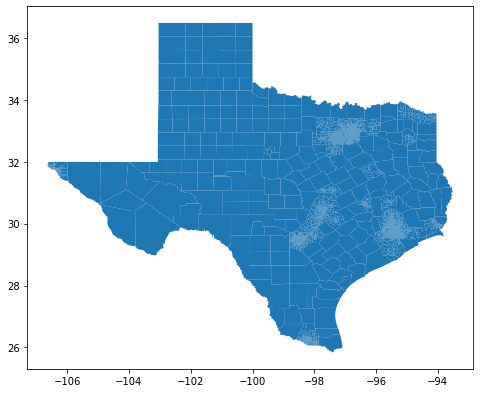

In [72]:
gUSCD.plot(figsize=(8,8))

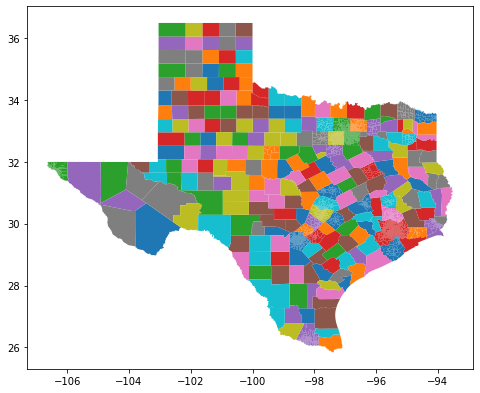

In [73]:
gUSCD.plot(column = 'county', figsize=(8,8))

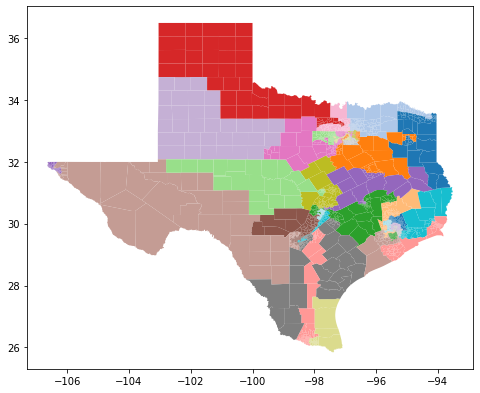

In [74]:
gUSCD.plot(column = 'district', figsize=(8,8), cmap = 'tab20')

Filtered GeoDataFrames too!

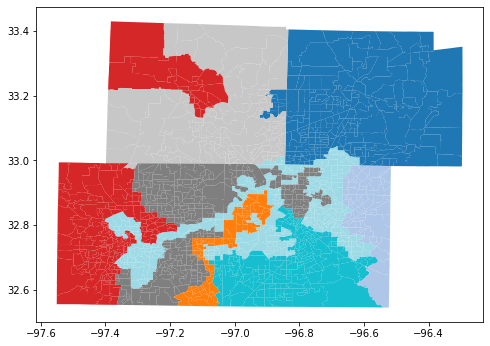

In [75]:
gUSCD[gUSCD['county'].isin(['Dallas', 'Denton', 'Tarrant', 'Collin'])].plot(column = 'district', figsize=(8,8), cmap = 'tab20')

#### Saving a GeoDataFrame
You can save your GeoDataFrame as a GeoJSON file. This will take some time for a large dataframe like ours. 

**Note that Colab's file folders do not provide storage after the runtime ends. You must either store a file on Google Drive or download it to your local machine to keep it.**

In [76]:
# This takes 30+ minutes for our dataframe.
%%script false  <--- This line prevents this cell from running.  Remove to use cell.

filepath = ""  #Write destination filepath string here.  End with .geojson
gdf.to_file(filepath, driver='GeoJSON')

CalledProcessError: ignored

# 3 - Run GerryChain on Graph
Gerrychain creates a large set of partitions on a graph. Texas will be represented as a graph, and each partition represents a possible way to break Texas into single member voting districts.

First we import various commands that Gerrychain uses.



In [77]:
import matplotlib.pyplot as plt
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election, metrics)
from gerrychain.proposals import recom
from gerrychain.metrics import efficiency_gap, mean_median
from functools import partial
import numpy

## a - Creating a graph of our geometries using GerryChain.

Here we are converting Texas into a graph. The vertex set of this graph will be our Voting Tabulation Districts, or VTDs. Edges will connect VTDs when they share a boundary.

In [78]:
#  You will get some error messages here.  All is well.  We will talk about this.

#gUSCD.rename(columns = {'polygon':'geometry'}, inplace = True)
#gUSCD.set_geometry('geometry')

graph = Graph.from_geodataframe(gUSCD)

/usr/local/lib/python3.7/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i
/usr/local/lib/python3.7/site-packages/gerrychain/graph/adjacency.py:68: UserWarning: Found overlaps among the given polygons. Indices of overlaps: {(1827, 1880), (3367, 3811), (5415, 5422), (5732, 5738), (90, 187), (1482, 1483), (2614, 2615), (2685, 2686), (5280, 5336), (3984, 5788), (2504, 2505), (3905, 3941), (4217, 4301), (266, 302), (1246, 1247), (5672, 5673), (967, 1002), (1479, 1514), (2183, 2187), (4495, 4499), (1503, 1504), (1808, 1842), (171, 231), (4108, 4155), (674, 786), (5249, 5293), (2265, 2328), (2024, 2112), (2310, 2314), (3823, 3872), (989, 1003), (3765, 3806), (4854, 5203), (3193, 3232), (722, 742), (1902, 1909), (4802, 4889), (639, 771), (4127, 4222), (4846, 4866), (3609, 3734), (180, 206), (1426, 1428), (2978, 2980), (4845, 4949), (1141,

### Optional - Prepping the graph for GerryChain

Some graphs may not satisfy the constraints you wish to use in GerryChain. For instance, a graph may not be connected and so cause a violation of GerryChains "contiguous" constraint for its districts. One can interact and edit the graph using the networkx package until it is ready for use in GerryChain.

In [79]:
import networkx as nx
nx.is_connected(graph)

True

We are lucky, and the map for Texas is connected. However, this is not the case for other states. For a tutorial for how to handls "islands", visit https://gerrychain.readthedocs.io/en/latest/user/islands.html

## b - Use Gerrychain to Generate a Collection of District Plans.

We start by defining the elections to keep track of during the ensemble generation. In this case, since we are working with the US Congressional Districts, we will focus on the State-wide federal elections.



#### Trackers

In [80]:
elections = [
    Election("SEN12", {"Democrat": "USSen_2012_D_Sadler_general", "Republican": "USSen_2012_R_Cruz_general"}),
    Election("SEN14", {"Democrat": "USSen_2014_D_Alameel_general", "Republican": "USSen_2014_R_Cornyn_general"}),
    Election("SEN18", {"Democrat": "USSen_2018_D_ORourke_general", "Republican": "USSen_2018_R_Cruz_general"}),
    Election("SEN20", {"Democrat": "USSen_2020_D_Hegar_general", "Republican": "USSen_2020_R_Cornyn_general"}),
    Election("PRES12", {"Democrat": "President_2012_D_Obama_general", "Republican": "President_2012_R_Romney_general"}),
    Election("PRES16", {"Democrat": "President_2016_D_Clinton_general", "Republican": "President_2016_R_Trump_general"}),
    Election("PRES20", {"Democrat": "President_2020_D_Biden_general", "Republican": "President_2020_R_Trump_general"}),
]
num_elections = len(elections)
print(num_elections)

7


**Any information we would like to track through the Markov chain must be included as an "updater", which is another object of Gerrychain.**

Here we add some other quantities along with the above election information to the updater. 

We also establish the final district map chosen by congress as the seed to the MCMC

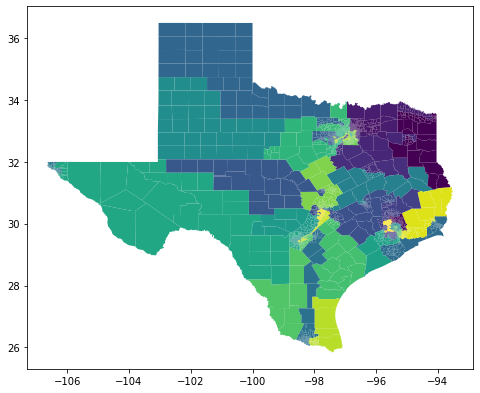

In [81]:
my_updaters = {"population": updaters.Tally("total_pop", alias="population"),
               "countysplits": updaters.county_splits("countysplits","county"),
               "WHTP":updaters.Tally("total_white", alias="WHTP"),
               "HISP":updaters.Tally("hisp_pop", alias="HISP"),
               "BLKP":updaters.Tally("total_black", alias="BLKP")}
election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

initial_partition = GeographicPartition(graph, assignment='district', updaters=my_updaters)
initial_partition.plot(figsize=(8,8))

#### Constraints

A legal constraint that all ensemble masp must meet is population equality. 

In [103]:
for district, pop in initial_partition["population"].items():
...     print("District {}: {}".format(district, pop))

District 6: 766987
District 19: 766987
District 17: 766987
District 27: 766987
District 13: 766987
District 28: 766987
District 10: 766987
District 21: 766987
District 31: 766987
District 11: 766987
District 35: 766987
District 20: 766987
District 23: 766987
District 1: 766987
District 4: 766987
District 14: 766987
District 22: 766987
District 9: 766987
District 15: 766987
District 25: 766987
District 34: 766987
District 36: 766987
District 3: 766987
District 32: 766987
District 26: 766987
District 24: 766987
District 30: 766987
District 5: 766987
District 33: 766987
District 16: 766986
District 7: 766987
District 29: 766987
District 2: 766987
District 18: 766987
District 38: 766987
District 8: 766987
District 12: 766987
District 37: 766987


We set our ideal population to be the total population (sum of population in each district) divided by the number of districts - in this case, 38. GeographicPartition comes with built-in area and perimeter updaters. The recom proposal needs to know the ideal population for the districts so that we can improve speed by discarding unbalanced partitions.

In [104]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)
print(len(initial_partition))
print(ideal_population)

38
766986.9736842106


In [105]:
p=[]
for x in initial_partition["population"]: 
    p.append(round(100*(1-initial_partition["population"][x]/ideal_population),2))
    #print(str(p)+"%")
#print(p)    
print(str(max(p))+"%", str(min(p))+"%") 

-0.0% -0.0%


We use functools.partial to bind the extra parameters (pop_col, pop_target, epsilon, node_repeats) of the recom proposal.

In [106]:
proposal = partial(recom,
                   pop_col="total_pop",
                   pop_target=ideal_population,
                   epsilon=0.01,
                   node_repeats=2
                  )

We introduce two other important constraints on plans.

1. The number of cut edges (a discrete proxy for perimeter) is bounded to twice the cut edges in the original plan
2. We create no new county splits - counties which are whole in the original plan must be kept whole

In [107]:
compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]),
    2*len(initial_partition["cut_edges"])
)

#split_bound = constraints.refuse_new_splits("countysplits")
split_bound = constraints.UpperBound(
    lambda p: len(p["countysplits"]),
    len(initial_partition["countysplits"])
)

# Creates a list of district names for later use.
districts = []
for node in graph.nodes:
  vtd_district = graph.nodes[node]['district']
  if vtd_district not in districts:
    districts.append(vtd_district)
num_districts = len(districts)


#### Configure the Markov Chain

1. Choose number of steps n
2. Configure MarkovChain object

In [87]:
n=600

In [88]:
chain = MarkovChain(
    proposal=proposal,
    constraints=[
        # District populations must stay within 2% of equality
        constraints.within_percent_of_ideal_population(initial_partition, 0.02),
        compactness_bound,
        split_bound,
    ],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=n
)

#### Run the Chain

Before we officially run the chain, we create a few empty objects to store the data we'd like to track - here election results, non-white voting age population, and partisan gini scores, respectively.

In [89]:
election_data = pandas.DataFrame([],range(0,n),[election.name for election in elections])
NWHT_data = pandas.DataFrame([],range(0,n),["MP"])
HVAP_data = pandas.DataFrame([],range(0,n),["HP"])
BVAP_data = pandas.DataFrame([],range(0,n),["BP"])

#this will store the partisan gini scores for each plan, and each election
gini = []
# in array form, because I can't figure out what to do with those whack sets
#demo_data_v2 = []

# Population, cut_edges
pop_vec = []
cut_vec = []

# Votes for each election
# Seven spots, for seven elections
votes = [[], [], [], [], [], [], []]

# mean-median, 
# efficiency gap
# hmss = number of districts won, for each particular election 
# (although the elections we discuss here are all state-wide 
#      i.e. this is a proxy for # districts won)
mms = []
egs = []
hmss = []


This will finally run Gerrychain! 

It will take 4-6 minutes to run through 100 steps

In [90]:
from IPython.display import clear_output
partition_counter = 0
for partition in chain:  # This loop writes the each VTD's assigned district for each partition in the chain.
    #store the results from all elections
    election_data.loc[partition_counter] = {election.name: sorted(partition[election.name].percents("Democrat")) for election in elections}
    #calculate the proportion non-white VAP in each district
    NWHT_data.loc[partition_counter] = {(partition["population"][key] - partition["WHTP"][key])/partition["population"][key] for key in partition["population"] }
    #calculate the proportion Hispanic VAP in each district
    HVAP_data.loc[partition_counter] = {partition["HISP"][key]/partition["population"][key] for key in partition["population"] }
    #calculate the proportion Black VAP in each district
    BVAP_data.loc[partition_counter] = {partition["BLKP"][key]/partition["population"][key] for key in partition["population"] }
    #add an array of gini scores 
    gini.append([metrics.partisan_gini(partition[election.name]) for election in elections])
  
    #Here are the other metrics
    pop_vec.append(sorted(list(partition["population"].values())))
    cut_vec.append(len(partition["cut_edges"]))
    mms.append([])
    egs.append([])
    hmss.append([])
    
    for elect in range(num_elections):
        votes[elect].append(sorted(partition[elections[elect].name].percents("Democrat")))
        mms[-1].append(mean_median(partition[elections[elect].name]))
        egs[-1].append(efficiency_gap(partition[elections[elect].name]))
        hmss[-1].append(partition[elections[elect].name].wins("Democrat"))

    for vtd in gUSCD.index:
      gUSCD.loc[vtd,'uscd_'+str(partition_counter)] = partition.assignment[vtd]
    clear_output()
    print('Partition '+str(partition_counter) + ' of '+ str(n-1) + ' recorded to GeoDataFrame.')
    partition_counter+=1
    if partition_counter==n: print("DONE") 

Partition 599 of 599 recorded to GeoDataFrame.
DONE


See the partitions recorded in the final columns of the table?

Plot orignial districts

In [99]:
gUSCD.head(3)

,node_geoids,geoid,county,cntyvtd,tabblock,bg,tract,cnty,cd,sldu,...,uscd_590,uscd_591,uscd_592,uscd_593,uscd_594,uscd_595,uscd_596,uscd_597,uscd_598,uscd_599
0,"0019508002001,0019509022083,0019508003022,0019...",001,Anderson,001000015,480019508002001,480019508002,48001950800,001,05,003,...,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0
1,"0039504002016,0039504002284,0039501001357,0039...",003,Andrews,003000003,480039504002016,480039504002,48003950400,003,11,031,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
2,"0050007003039,0050010014014,0050006002025,0050...",005,Angelina,005000020,480050007003039,480050007003,48005000700,005,01,003,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [127]:
import numpy as np

In [137]:

c = np.random.randint(gUSCD.columns.__len__())
gUSCD.columns[c]

'uscd_311'

In the following two plots, compare our initial partition (U.S. Congressional Districts) to the partition 100 steps down the chain.

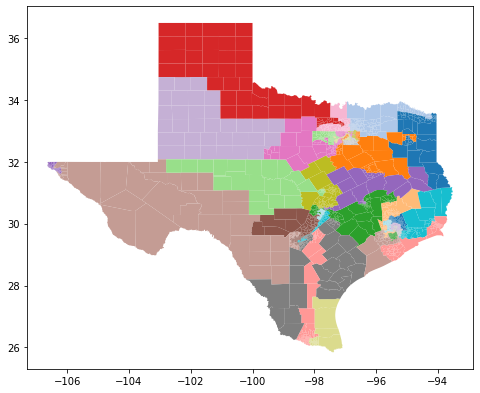

In [101]:
gUSCD.plot(column='district', figsize=(8,8), cmap='tab20')

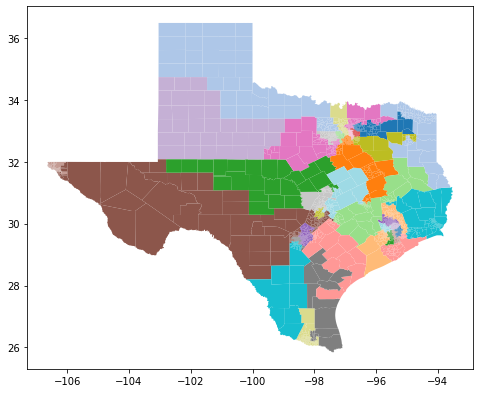

In [140]:
gUSCD.plot(column='uscd_99', figsize=(8,8), cmap='tab20')

# 4 - Extract and Use Data from Partitions Recorded on the GeoDataFrame
Now it's time to run an experiment. There are a few examples below that you are welcome to use or edit. For your reference, here are the available columns in the GeoDataFrame.

In [141]:
list(gUSCD.columns)

['node_geoids',
 'geoid',
 'county',
 'cntyvtd',
 'tabblock',
 'bg',
 'tract',
 'cnty',
 'cd',
 'sldu',
 'sldl',
 'polygon',
 'node_districts',
 'district',
 'node_id',
 'total_pop_prop',
 'seats_cd',
 'seats_sldu',
 'seats_sldl',
 'total_pop',
 'total_1race',
 'total_white',
 'total_black',
 'total_native',
 'total_asian',
 'total_pacific',
 'total_other',
 'total_2ormorerace',
 'total_2race',
 'total_white_black',
 'total_white_native',
 'total_white_asian',
 'total_white_pacific',
 'total_white_other',
 'total_black_native',
 'total_black_asian',
 'total_black_pacific',
 'total_black_other',
 'total_native_asian',
 'total_native_pacific',
 'total_native_other',
 'total_asian_pacific',
 'total_asian_other',
 'total_pacific_other',
 'total_3race',
 'total_white_black_native',
 'total_white_black_asian',
 'total_white_black_pacific',
 'total_white_black_other',
 'total_white_native_asian',
 'total_white_native_pacific',
 'total_white_native_other',
 'total_white_asian_pacific',
 'total

## Histograms of various statistics accross districts

We will focus on the 2020 presidential election. 

In [142]:
el = "PRES20"

num_dist = len(election_data[el].iloc[0])
approved = sorted(election_data[el].loc[0][dist] for dist in range(0,num_dist))

ensemble = []
for pos in range(100,n):
    #fills in election information for chosen election from each ensemble map
    ensemble.append(sorted(election_data[el].loc[pos][dist] for dist in range(0,num_dist))) 

approved = numpy.asarray(approved)
ensemble = numpy.asarray(ensemble)


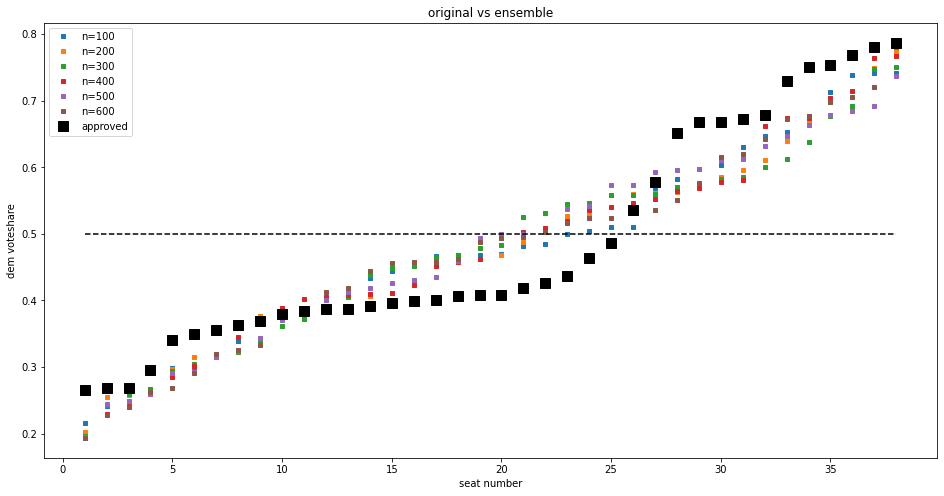

In [159]:
seatvec = np.arange(1,len(approved)+1)

plt.figure(figsize=[16,8])
plt.plot(seatvec, ensemble[000], 's', ms=4, label='n=100')
plt.plot(seatvec, ensemble[100], 's', ms=4, label='n=200')
plt.plot(seatvec, ensemble[200], 's', ms=4, label='n=300')
plt.plot(seatvec, ensemble[300], 's', ms=4, label='n=400')
plt.plot(seatvec, ensemble[400], 's', ms=4, label='n=500')
plt.plot(seatvec, ensemble[499], 's', ms=4, label='n=600')
plt.plot(seatvec, 0*seatvec+0.5, 'k--')
plt.plot(seatvec, approved, 'ks', ms=10, label='approved')
plt.xlabel('seat number')
plt.ylabel('dem voteshare')
plt.title('original vs ensemble')
plt.legend(loc=2)
plt.show()

In [147]:
import scipy.stats as st

def distribution_report(ensemble, actual, title='Quantity in Question'):
    ract = actual
    ravg = numpy.mean(ensemble)
    rdev = numpy.std(ensemble)

    zval = (ract - ravg) / rdev
    pct  = (1.0 - st.norm.cdf(zval))
    
    digits = 7
    oddsstr = "less than 1:1T"
    if pct>0:
        odds = 1/pct
        digits = int(numpy.ceil(numpy.log10(odds)))
        if digits < 12:
            odds2sf = int(numpy.round(odds, 2-digits))
            oddsstr = "1 in " + f"{odds2sf:,}"
    
    print(title)
    print('--------------------------------')
    print('Mean Value:        %12.3f' % (ravg) )
    print('Standard Dev:      %12.3f' % (rdev) )
    print('Actual number:     %12.3f' % (ract))
    print('')
    print('Z-Score:           %12.3f' % (zval))
    print('Likelihood:        %12.10f' % (pct))
    print('Chances:' + ' '*(16-digits)+'%s' % (oddsstr)) 
    

## Number of Republican Seats

Let's compare the number of Republican seats in the approved plan to the number of democratic seats in the ensemble

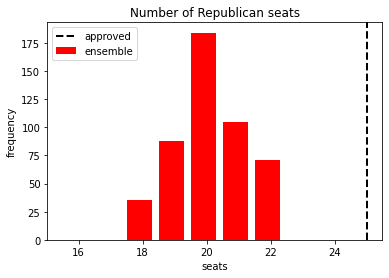

Number of Republican Seats
--------------------------------
Mean Value:              20.280
Standard Dev:             1.209
Actual number:           25.000

Z-Score:                  3.904
Likelihood:        0.0000472764
Chances:           1 in 21,000


In [144]:
rseats_approved = numpy.sum(approved<0.5)
rseats_ensemble = numpy.sum(ensemble<0.5, axis=1)

mybins=[ 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5]

plt.figure()
plt.hist(rseats_ensemble, bins=mybins, color='r', width=.8, label='ensemble')
plt.axvline(rseats_approved, **{'color':'k', 'linestyle':'--', 'linewidth':2}, label='approved')
plt.title('Number of Republican seats')
plt.xlabel('seats')
plt.ylabel('frequency')
plt.legend(loc=2)
plt.show()

distribution_report(rseats_ensemble, rseats_approved, "Number of Republican Seats")

## Number of "Safe" Seats

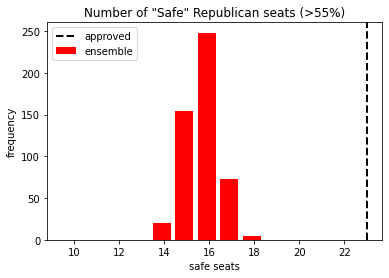

Number of "Safe" Republican Seats (>55%)
--------------------------------
Mean Value:              15.778
Standard Dev:             0.778
Actual number:           23.000

Z-Score:                  9.287
Likelihood:        0.0000000000
Chances:         less than 1:1T


In [146]:
rsafe_approved = numpy.sum(approved<0.45)
rsafe_ensemble = numpy.sum(ensemble<0.45, axis=1)

mybins = numpy.arange(9.5, 20.5, 1.0)

plt.figure()
plt.hist(rsafe_ensemble, mybins, color='r', width=.8, label='ensemble')
plt.axvline(rsafe_approved, **{'color':'k', 'linestyle':'--', 'linewidth':2}, label='approved')
plt.title('Number of "Safe" Republican seats (>55%)')
plt.xlabel('safe seats')
plt.ylabel('frequency')
plt.legend(loc=2)
plt.show()

distribution_report(rsafe_ensemble, rsafe_approved, 'Number of "Safe" Republican Seats (>55%)')

## Republican Outcome in the deciding seat

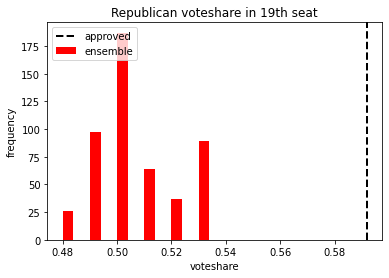

Republican Voteshare in 19th Seat
--------------------------------
Mean Value:               0.510
Standard Dev:             0.013
Actual number:            0.592

Z-Score:                  6.287
Likelihood:        0.0000000002
Chances:      1 in 6,200,000,000


In [161]:
deciding_approved = (1 - approved[19])
deciding_ensemble = (1 - ensemble[:,19])

mybins=numpy.arange(.48, .54, .01)

plt.figure()
plt.hist(deciding_ensemble, bins=mybins, color='r', width=.004, label='ensemble')
plt.axvline(deciding_approved, **{'color':'k', 'linestyle':'--', 'linewidth':2}, label='approved')
plt.title('Republican voteshare in 19th seat')
plt.xlabel('voteshare')
plt.ylabel('frequency')
plt.legend(loc=2)
plt.show()

distribution_report(deciding_ensemble, deciding_approved, "Republican Voteshare in 19th Seat")

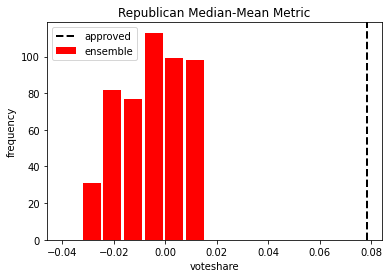

Republican Median-Mean metric
--------------------------------
Mean Value:              -0.005
Standard Dev:             0.012
Actual number:            0.078

Z-Score:                  6.951
Likelihood:        0.0000000000
Chances:    less than 1:1T


In [162]:
mm_approved = numpy.median(1 - approved) - numpy.mean(1 - approved)
mm_ensemble = numpy.median(1 - ensemble, axis=1) - numpy.mean(1 - ensemble, axis=1)

mybins=numpy.arange(-.04, .04, .008)

plt.figure()
plt.hist(mm_ensemble, mybins, color='r', width=.007, label='ensemble')
plt.axvline(mm_approved, **{'color':'k', 'linestyle':'--', 'linewidth':2}, label='approved')
plt.title('Republican Median-Mean Metric')
plt.xlabel('voteshare')
plt.ylabel('frequency')
plt.legend(loc=2)
plt.show()

distribution_report(mm_ensemble, mm_approved, "Republican Median-Mean metric")

In [163]:
import numpy as np
from typing import Any, Optional, Iterable

USED_STUFFED_IN_PLOTS = True


def get_comparison_market_size(districts: int) -> int:
    if districts <= 40:
        msize = 4
    elif districts <= 80:
        msize = 2
    else:
        msize = 1
    return msize

def vote_vector_ensemble_comps(ensemble_transposed: np.ndarray, title: str, pc_thresh: float = 0.01,
                               have_actual: bool = True, comp_plans=False, comp_plans_vectors: list[np.ndarray] = [],
                               comp_plans_names: list[str] = [], comp_plans_colors: list[str] = [],
                               comp_plans_pnums: list[bool] = [], fill_color=None, h_line_label: str = '',
                               y_axis_label: str = '') -> Any:
    # PURPOSE: allow us to include multiple plans for comparison
    #
    # INPUTS
    #     ensemble:  (nDistrict x nPlan) array of values. MUST BE SORTED WITHIN EACH COLUMN
    #     title: string for title
    #
    # OPTIONAL INPUTS [def/type/[default value] ]
    #     pc_thresh:  quantile markers for violin plots (e.g.: 0.01 means 1% and 99%)
    #     have_actual:   Does ensemble include data assoc. with an exacted plan? 
    #             If so, assume FIRST COLUMN is enacted/[True]
    #     comp_plans:  Do we include a list of plans for comparison?/Bool/[False]
    #     comp_plans_vv: vote vectors for plans to compare/
    #             list of K numpy arrays, where "K"=# of plans provided/[]
    #     comp_plans_names: names to use for legend/list of K strings/[]
    #     comp_plans_colors: colors for dots/list of K strings/[]
    #     comp_plans_pnums: plot district numbers?/ list of K Bool/[]
    #     

    # for making things look nice
    vbuffer = .04

    # get shape of data
    districts, chainlength = np.shape(ensemble_transposed)

    # list of integers (for plotting)
    district_numbers = np.arange(districts) + 1

    # create Seats/votes curve for enacted plan
    if have_actual:
        vs_actual = np.array(sorted(ensemble_transposed[:, 0]))

    # collect distributions of results across ensemble
    samples_to_plot = range(int(0.5 * chainlength), chainlength, 10)
    vs_ensemble = [ensemble_transposed[i, samples_to_plot] for i in range(districts)]
    vs_lower, vs_median, vs_upper = calculate_ensemble_district_statistics(vs_ensemble, pc_thresh)

    # identify stuffed, packed, and cracked districts
    # ONLY makes sense if actual plan present
    if have_actual:
        dmin = 0
        dmax = districts
        cracked, packed, stuffed = determine_cracked_packed_stuffed_indices(dmin, dmax, vs_actual, vs_lower, vs_upper)
    else:
        stuffed = []
        cracked = []
        packed = []

    # -----------------------------------------------

    # Create the plot
    figure = plt.figure(figsize=(8.5, 4.5))

    violin_parts = plt.violinplot(vs_ensemble, district_numbers, showextrema=False, widths=0.6,
                                  quantiles=[[pc_thresh, 1 - pc_thresh] for _ in district_numbers])

    if fill_color is not None:
        for vp in violin_parts['bodies']:
            vp.set_facecolor(fill_color)
            vp.set_alpha(0.5)

    plt.plot(district_numbers, vs_median, 'bo', markersize=2, label="Median of Ensemble")

    marker_size = get_comparison_market_size(districts)
    if have_actual:
        plt.plot(district_numbers, vs_actual, 'ro', markersize=marker_size, label="Actual Vote Shares")
    plt.plot(district_numbers, 0 * district_numbers + 0.5, 'k--', lw=0.75, label=h_line_label)

    # ---------------------------------------------

    # labelling stuffed districts
    if len(stuffed) > 2:
        smin_loc = 1 + stuffed[0] - 0.5
        smax_loc = 1 + stuffed[-1] + 0.5
        smin_val = vs_actual[stuffed[0]] - vbuffer
        smax_val = vs_actual[stuffed[-1]] + vbuffer
        if USED_STUFFED_IN_PLOTS:
            plt.fill([smin_loc, smax_loc, smax_loc, smin_loc], [smin_val, smin_val, smax_val, smax_val], 'y', alpha=0.3)
            plt.text(0.5 * (smin_loc + smax_loc), smax_val + vbuffer, '"Stuffing"',
                     **{'ha': 'center', 'weight': 'bold'})

    # labelling cracked districts
    if len(cracked) > 2:
        cmin_loc = 1 + cracked[0] - 0.5
        cmax_loc = 1 + cracked[-1] + 0.5
        cmin_val = vs_actual[cracked[0]] - vbuffer
        cmax_val = vs_actual[cracked[-1]] + vbuffer
        plt.fill([cmin_loc, cmax_loc, cmax_loc, cmin_loc], [cmin_val, cmin_val, cmax_val, cmax_val], 'y', alpha=0.3)
        plt.text(0.5 * (cmin_loc + cmax_loc), cmin_val - 2 * vbuffer, '"Cracking"',
                 **{'ha': 'center', 'weight': 'bold'})

    # labelling packed districts
    if len(packed) > 2:
        pmin_loc = 1 + packed[0] - 0.5
        pmax_loc = 1 + packed[-1] + 0.5
        pmin_val = vs_actual[packed[0]] - vbuffer
        pmax_val = vs_actual[packed[-1]] + vbuffer
        plt.fill([pmin_loc, pmax_loc, pmax_loc, pmin_loc], [pmin_val, pmin_val, pmax_val, pmax_val], 'y', alpha=0.3)
        plt.text(0.5 * (pmin_loc + pmax_loc), pmax_val - 2 * vbuffer, '"Packing"', **{'ha': 'center', 'weight': 'bold'})

    # ---------------------------------------------------------    

    # "Comparison Plans", if applicable
    if comp_plans:
        for i in np.arange(len(comp_plans_vectors)):
            y1 = np.array(sorted(comp_plans_vectors[i]))
            plt.plot(district_numbers, y1, color=comp_plans_colors[i], marker='o', markersize=marker_size, ls='',
                     label=comp_plans_names[i])

    # Replace 1-n with actual district numbers
    if comp_plans_pnums:
        # Determine if district number should be plotted
        true_pnums = [i1 for i1, x in enumerate(comp_plans_pnums) if x]
        whpnum = true_pnums[0]

        # Order of districts for x-axis
        dnumvec = np.argsort(comp_plans_vectors[whpnum])

        # Use dnumvec computed above
        dnumstr = [str(x + 1) for x in dnumvec]

        plt.xticks(np.arange(len(dnumvec)) + 1, dnumstr)
    else:
        plt.xlim(0, districts + 1)

    # Set y axis limits based on data; in particular actual/compaison plans
    if have_actual:
        plt.ylim(vs_actual[0] - vbuffer, vs_actual[-1] + vbuffer)
    elif comp_plans:
        # Get min and max of comparison plans 
        ymin = 0.5
        ymax = 0.5
        for i in np.arange(len(comp_plans_vectors)):
            y1 = np.array(sorted(comp_plans_vectors[i]))
            ymin = np.min([y1[0], ymin])
            ymax = np.max([y1[-1], ymax])

        plt.ylim(ymin - vbuffer, ymax + vbuffer)
    else:
        plt.ylim(vs_lower[0] - vbuffer, vs_upper[-1] + vbuffer)

    plt.xlabel('District Number')
    plt.ylabel(y_axis_label)
    plt.title(title)
    plt.legend(loc=2, fontsize=8)
    plt.tight_layout()
    return figure


def calculate_ensemble_district_statistics(ensemble_transposed: list[list[float]], pc_thresh: float) -> \
        tuple[list[float], list[float], list[float]]:
    vs_lower = [np.percentile(x, 100 * pc_thresh) for x in ensemble_transposed]
    vs_median = [np.percentile(x, 50) for x in ensemble_transposed]
    vs_upper = [np.percentile(x, 100 * (1 - pc_thresh)) for x in ensemble_transposed]
    return vs_lower, vs_median, vs_upper


def determine_cracked_packed_stuffed_indices(dmin: int, dmax: int, vs_actual: np.ndarray, vs_lower: list[float],
                                             vs_upper: list[float]) -> tuple[list[int], list[int], list[int]]:
    stuffed = [i for i in range(dmin, dmax) if (vs_upper[i] < vs_actual[i] < .5)]
    cracked = [i for i in range(dmin, dmax) if (vs_lower[i] > vs_actual[i] > .3 and vs_actual[i] < .5)]
    packed = [i for i in range(dmin, dmax) if (vs_actual[i] > vs_upper[i] and vs_actual[i] > .5)]
    return cracked, packed, stuffed


def determine_cracked_packed_stuffed_districts(districts: int, instance_p: np.ndarray, vs_lower: list[float],
                                               vs_upper: list[float]) -> tuple[list[int], list[int], list[int]]:
    cracked, packed, stuffed = determine_cracked_packed_stuffed_indices(0, districts, np.array(sorted(instance_p)),
                                                                        vs_lower, vs_upper)
    sorted_index_to_district = np.argsort(instance_p)
    cracked = [sorted_index_to_district[x] for x in cracked]
    packed = [sorted_index_to_district[x] for x in packed]
    stuffed = [sorted_index_to_district[x] for x in stuffed]
    return cracked, packed, stuffed


def vote_vector_ensemble(ensemble_transposed: np.ndarray, title: str, pc_thresh: float = 0.01,
                         have_actual: bool = True, comparison_label: str = "Actual Vote Shares",
                         display_districts_numbers: bool = True) -> Any:
    # INPUTS
    #     ensemble:  (nDistrict x nPlan) array of values. MUST BE SORTED WITHIN EACH COLUMN
    #     title: string for title
    #
    # OPTIONAL INPUTS [name/def/[default value]
    #     pc_thresh:  quantile markers for violin plots (e.g.: 0.01 means 1% and 99%)
    #     have_actual:   Does ensemble include data assoc. with an exacted plan? 
    #             If so, assume FIRST COLUMN is enacted/[True]  

    # for making things look nice
    vbuffer = .02

    # get shape of data
    districts, chainlength = np.shape(ensemble_transposed)

    # list of integers (for plotting)
    seats = np.arange(districts) + 1

    # collect distributions of results across ensemble
    samples_to_plot = range(int(0.5 * chainlength), chainlength, 10)
    vs_ensemble = [ensemble_transposed[i, samples_to_plot] for i in range(districts)]
    vs_lower, vs_median, vs_upper = calculate_ensemble_district_statistics(vs_ensemble, pc_thresh)

    # create Seats/votes curve for enacted plan
    # identify stuffed, packed, and cracked districts
    # ONLY makes sense if actual plan present
    if have_actual:
        vs_actual = np.array(sorted(ensemble_transposed[:, 0]))

        dmin = 0
        dmax = districts
        cracked, packed, stuffed = determine_cracked_packed_stuffed_indices(dmin, dmax, vs_actual, vs_lower, vs_upper)
    else:
        vs_actual = None
        stuffed = []
        cracked = []
        packed = []

    # -----------------------------------------------

    # Create the plot
    myplot = plt.figure(figsize=(6.5, 3.5))

    plt.violinplot(vs_ensemble, seats, showextrema=False, widths=0.6,
                   quantiles=[[pc_thresh, 1 - pc_thresh] for _ in seats])
    plt.plot(seats, vs_median, 'bo', markersize=2, label="Median of Ensemble")
    if have_actual:
        marker_size = get_comparison_market_size(districts)
        plt.plot(seats, vs_actual, 'ro', markersize=marker_size, label=comparison_label)
    plt.plot(seats, 0 * seats + 0.5, 'k--', lw=0.75, label="Needed to Win")

    # labelling stuffed districts
    if len(stuffed) > 2:
        smin_loc = 1 + stuffed[0] - 0.5
        smax_loc = 1 + stuffed[-1] + 0.5
        smin_val = vs_actual[stuffed[0]] - vbuffer
        smax_val = vs_actual[stuffed[-1]] + vbuffer

        if USED_STUFFED_IN_PLOTS:
            plt.fill([smin_loc, smax_loc, smax_loc, smin_loc], [smin_val, smin_val, smax_val, smax_val], 'y', alpha=0.3)
            plt.text(0.5 * (smin_loc + smax_loc), smax_val + vbuffer, '"Stuffing"',
                     **{'ha': 'center', 'weight': 'bold'})

    # labelling cracked districts
    if len(cracked) > 2:
        cmin_loc = 1 + cracked[0] - 0.5
        cmax_loc = 1 + cracked[-1] + 0.5
        cmin_val = vs_actual[cracked[0]] - vbuffer
        cmax_val = vs_actual[cracked[-1]] + vbuffer
        plt.fill([cmin_loc, cmax_loc, cmax_loc, cmin_loc], [cmin_val, cmin_val, cmax_val, cmax_val], 'y', alpha=0.3)
        plt.text(0.5 * (cmin_loc + cmax_loc), cmin_val - 2 * vbuffer, '"Cracking"',
                 **{'ha': 'center', 'weight': 'bold'})

    # labelling packed districts
    if len(packed) > 2:
        pmin_loc = 1 + packed[0] - 0.5
        pmax_loc = 1 + packed[-1] + 0.5
        pmin_val = vs_actual[packed[0]] - vbuffer
        pmax_val = vs_actual[packed[-1]] + vbuffer
        plt.fill([pmin_loc, pmax_loc, pmax_loc, pmin_loc], [pmin_val, pmin_val, pmax_val, pmax_val], 'y', alpha=0.3)
        plt.text(0.5 * (pmin_loc + pmax_loc), pmax_val - 2 * vbuffer, '"Packing"', **{'ha': 'center', 'weight': 'bold'})

    # Replace 1-n with actual district numbers
    if display_districts_numbers and have_actual:
        # Order of districts for x-axis
        dnumvec = np.argsort(np.array(ensemble_transposed[:, 0]))

        # Use dnumvec computed above
        dnumstr = [str(x + 1) for x in dnumvec]

        plt.xticks(np.arange(len(dnumvec)) + 1, dnumstr)
    else:
        plt.xlim(0, districts + 1)

    if have_actual:
        plt.ylim(vs_actual[0] - vbuffer, vs_actual[-1] + vbuffer)
    else:
        plt.ylim(vs_lower[0] - vbuffer, vs_upper[-1] + vbuffer)

    plt.xlabel('District Number')
    plt.ylabel('Democratic vote share')
    plt.title(title)
    plt.legend(loc=2, fontsize=8)
    plt.tight_layout()
    return myplot



def seats_votes_ensemble(ensemble_transposed: np.ndarray, title: str, statewide: Any = None, have_actual: bool = True) -> Any:
    # INPUTS
    #     ensemble:  (nDistrict x nPlan) array of values. MUST BE SORTED WITHIN EACH COLUMN
    #     title: string for title
    # OPTIONAL INPUTS [name/def/[default value]
    #    statewide/ Statewide Democratic vote %. If None, use mean of enacted vote vector/[None]
    #    have_actual/Does ensemble include data assoc. with an exacted plan? 
    #             If so, assume FIRST COLUMN is enacted/[True]

    #     plot them together in the same figure
    # -------------------------------------------------

    myfigure = plt.figure(figsize=(6.5, 5))

    plt.subplot(211)
    plot_seats_votes_ensemble(ensemble_transposed, title, statewide)

    if have_actual:
        # panel 2
        # -------------------
        plt.subplot(212)
        plot_seats_votes_actual(ensemble_transposed, None, statewide, have_actual)

    return myfigure


def plot_seats_votes_ensemble(ensemble_transposed: np.ndarray, title: str, statewide: Any = None) -> None:
    districts, chainlength = np.shape(ensemble_transposed)

    # now compute an average seats/votes over many samples
    # ------------------------------------------------
    avg_range = range(int(chainlength / 2), chainlength)
    avg_seatsvotes = 0 * np.array(sorted(ensemble_transposed[:, 0], reverse=True))
    avg_seats = 0
    avg_votes = 0
    for step in avg_range:
        tmp_race_results = np.array(sorted(ensemble_transposed[:, step], reverse=True))
        tmp_seats = np.sum(tmp_race_results > .5)
        tmp_votes = np.mean(tmp_race_results) if statewide is None else statewide
        tmp_seatsvotes = [tmp_votes - r + 0.5 for r in tmp_race_results]

        avg_seatsvotes += tmp_seatsvotes
        avg_seats += tmp_seats
        avg_votes += tmp_votes

    avg_seatsvotes /= len(avg_range)
    avg_votes /= len(avg_range)
    avg_seats /= len(avg_range)

    # Convert to arrays, reflect seats-votes curve about (.5, .5)
    avg_seatsvotes1 = np.array(avg_seatsvotes)
    avg_seatsvotes2 = np.flip(1 - avg_seatsvotes1)

    plt.title(title)

    # panel 1: the ensemble
    # -------------------
    seats = range(1, districts + 1)
    plt.plot(seats, avg_seatsvotes1, 'b', lw=2, label="Democrats")
    plt.plot(seats, avg_seatsvotes2, 'r', lw=2, label="Republicans")
    plt.fill_between(seats, avg_seatsvotes1, avg_seatsvotes2, where=(avg_seatsvotes1 > avg_seatsvotes2),
                     interpolate=True, **{'alpha': .2})

    # labeling
    hbuff = 0.25
    vbuff = 0.01
    dpos = [ii for ii in range(districts) if avg_seatsvotes1[ii] > 0.5]
    first = dpos[0]
    start = avg_seatsvotes1[first - 1]
    final = avg_seatsvotes1[first]
    slope = final - start
    hmin = 1 + (first - 1) + (0.5 - start) / slope
    hmid = 1 + (districts - 1) / 2.0
    hmax = hmin + 2 * (hmid - hmin)
    vmax = avg_seatsvotes1[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
            avg_seatsvotes1[round(hmid - 0.5) - 1] + avg_seatsvotes1[round(hmid + 0.5) - 1])
    vmid = 0.5
    vmin = vmax - 2 * (vmax - vmid)
    plt.plot([hmin - hbuff, hmax + hbuff], [vmid, vmid], '--', lw=2, color="green", label="Equal Voteshares")
    plt.plot([hmid, hmid], [vmin - vbuff, vmax + vbuff], '--', lw=2, color="gray", label="Majority Seat")

    # Should "actual" result be the location on the curve at the actual statewide percentage?
    # vs. the
    plt.plot([avg_seats + 0.5], [avg_votes], 'bs', lw=2, label="Actual Dem. Result")
    plt.plot([districts - avg_seats + 0.5], [1 - avg_votes], 'rs', label="Actual Rep. Result")

    print("Vote Needed for Majority (D-R) -- Ensemble:   %4.4f" % (vmax - vmin))
    print("Seats at 50%% Voteshare   (D-R) -- Ensemble:     %4d" % (hmax - hmin))

    # cleaning up
    plt.xlim(0, districts + 1)
    plt.ylim(0.25, 0.75)
    plt.text(hmid, .7, "Average of \n Sampled Plans", **{'va': 'top', 'ha': 'center', 'size': 10, 'weight': 'bold'})
    plt.ylabel("Needed SW Voteshare")
    plt.legend(**{'fontsize': 8})


def plot_seats_votes_actual(ensemble_transposed: np.ndarray, title: str, statewide: Any = None, have_actual: bool = True) -> None:
    districts, chainlength = np.shape(ensemble_transposed)

    if have_actual:
        # get the actual outcomes
        actuals = np.array(sorted(ensemble_transposed[:, 0], reverse=True))
        actual_seats = np.sum(actuals > .5)
        actual_votes = np.mean(actuals) if statewide is None else statewide

        # seats / votes curve, assuming uniform swing
        seatsvotes1 = actual_votes - actuals + 0.5

        # apply reflection about (.5, .5)
        seatsvotes2 = np.flip(1 - seatsvotes1)
    else:
        # If None, we just don't plot
        actual_votes = statewide

    plt.title(title)

    seats = range(1, districts + 1)
    plt.plot(seats, seatsvotes1, 'b', lw=2, label="Democrats")
    plt.plot(seats, seatsvotes2, 'r', lw=2, label="Republicans")
    plt.fill_between(seats, seatsvotes1, seatsvotes2, where=(seatsvotes1 > seatsvotes2), interpolate=True,
                     **{'alpha': .2})

    # labeling
    dpos = [x for x in range(districts) if seatsvotes1[x] > 0.5]
    first = dpos[0]
    start = seatsvotes1[first - 1]
    final = seatsvotes1[first]
    slope = final - start

    hmin = 1 + (first - 1) + (0.5 - start) / slope
    hmid = 1 + (districts - 1) / 2.0
    hmax = hmin + 2 * (hmid - hmin)

    vmax = seatsvotes1[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
            seatsvotes1[round(hmid - 0.5) - 1] + seatsvotes1[round(hmid + 0.5) - 1])
    vmid = 0.5
    vmin = vmax - 2 * (vmax - vmid)

    hbuff = 0.25
    vbuff = 0.01
    plt.plot([hmin - hbuff, hmax + hbuff], [vmid, vmid], '--', lw=2, color="green", label="Equal Voteshares")
    plt.plot([hmid, hmid], [vmin - vbuff, vmax + vbuff], '--', lw=2, color="gray", label="Majority Seat")
    plt.plot([actual_seats + 0.5], [actual_votes], 'bs', lw=2, label="Actual Dem. Result")
    plt.plot([districts - actual_seats + 0.5], [1 - actual_votes], 'rs', label="Actual Rep. Result")

    print("Vote Needed for Majority (D-R) -- Actual:     %4.4f" % (vmax - vmin))
    print("Seats at 50%% Voteshare   (D-R) -- Actual:       %4d" % (hmax - hmin))

    # cleaning up
    plt.xlim(0, districts + 1)
    plt.ylim(0.25, 0.75)
    plt.ylabel("Needed SW Voteshare")
    plt.xlabel("Number of Seats")
    plt.text(hmid, .7, "Enacted Plan", **{'va': 'top', 'ha': 'center', 'size': 10, 'weight': 'bold'})
    plt.legend(**{'fontsize': 8})
    plt.tight_layout()


def plot_seats_votes_actual_inverted(ensemble_transposed: np.ndarray, title: str) -> None:
    districts, chainlength = np.shape(ensemble_transposed)

    # get the actual outcomes
    actuals = np.array(sorted(ensemble_transposed[:, 0], reverse=True))
    actual_seats = np.sum(actuals > .5)
    actual_votes = np.mean(actuals)

    # seats / votes curve, assuming uniform swing
    seatsvotes1 = actual_votes - actuals + 0.5

    # apply reflection about (.5, .5)
    seatsvotes2 = np.flip(1 - seatsvotes1)

    plt.title(title)

    seats = range(1, districts + 1)
    plt.plot(seatsvotes1, seats, 'b', lw=2, label="Democrats")
    plt.plot(seatsvotes2, seats, 'r', lw=2, label="Republicans")
    #plt.fill_between(seats, seatsvotes1, seatsvotes2, where=(seatsvotes1 > seatsvotes2), interpolate=True,
    #                 **{'alpha': .2})

    # labeling
    dpos = [x for x in range(districts) if seatsvotes1[x] > 0.5]
    first = dpos[0]
    start = seatsvotes1[first - 1]
    final = seatsvotes1[first]
    slope = final - start

    hmin = 1 + (first - 1) + (0.5 - start) / slope
    hmid = 1 + (districts - 1) / 2.0
    hmax = hmin + 2 * (hmid - hmin)

    vmax = seatsvotes1[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
            seatsvotes1[round(hmid - 0.5) - 1] + seatsvotes1[round(hmid + 0.5) - 1])
    vmid = 0.5
    vmin = vmax - 2 * (vmax - vmid)

    hbuff = 0.25
    vbuff = 0.01
    plt.plot([vmid, vmid], [hmin - hbuff, hmax + hbuff], '--', lw=2, color="green", label="Equal Voteshares")
    plt.plot([vmin - vbuff, vmax + vbuff], [hmid, hmid], '--', lw=2, color="gray", label="Majority Seat")
    plt.plot([actual_votes], [actual_seats + 0.5], 'bs', lw=2, label="Actual Dem. Result")
    plt.plot([1 - actual_votes], [districts - actual_seats + 0.5], 'rs', label="Actual Rep. Result")

    # cleaning up
    plt.xlim(0, 1)
    plt.ylim(1, districts + 1)
    plt.xlabel("Percent Vote Share")
    plt.ylabel("Number of Seats")
    plt.text(hmid, .7, "Enacted Plan", **{'va': 'top', 'ha': 'center', 'size': 10, 'weight': 'bold'})
    plt.legend(**{'fontsize': 8})
    plt.tight_layout()


def mean_median_distribution(ensemble: np.ndarray, instance: np.ndarray,
                             title: str = "Distribution of Mean-Median Scores", xlabel: str = None) -> Any:
    mme = np.median(ensemble, axis=1) - np.mean(ensemble, axis=1)
    mmi = np.median(instance) - np.mean(instance)

    mmmedian = np.median(mme)
    mmmean = np.mean(mme)
    mmstd = np.std(mme)
    mmbinedges = np.linspace(mmmean - 5 * mmstd, mmmean + 5 * mmstd, 51)

    print("Percentile Score:  %8.6f." % (stats.percentileofscore(mme, mmi)))

    mmhist, mmedges = np.histogram(mme, bins=mmbinedges)

    myfigure = plt.figure(figsize=(6.5, 3.5))

    plt.hist(mme, bins=mmbinedges, color="xkcd:dark blue", **{'alpha': 0.3})
    plt.axvline(x=mmmedian, color="green", ls='--', lw=2.5, ymax=0.75, label="Ensemble Median")
    plt.axvline(x=mmi, color="purple", ls='--', lw=2.5, ymax=0.75, label="Proposed Districts")
    plt.xlim(mmmean - 4 * mmstd, mmmean + 4 * mmstd)

    plt.ylim(0, np.max(mmhist) * 1.4)
    plt.tick_params(
        axis='y',  # changes apply to the y-axis
        which='both',  # both major and minor ticks are affected
        left=False,  # ticks along the bottom edge are off
        right=False,  # ticks along the top edge are off
        labelleft=False)  # labels along the bottom edge are off
    plt.legend(loc="upper center")
    plt.xlabel(xlabel)
    plt.ylabel("Relative Frequency")
    plt.title(title)

    return myfigure


def mean_median_partisan_bias(ensemble_transposed: np.ndarray, have_actual: bool = True,
                              comparison_label: str = "Enacted Districts") -> Any:
    # get shape of data
    districts, chainlength = np.shape(ensemble_transposed)
    hmid = 1 + (districts - 1) / 2.0

    # space allocation
    majority_vs = np.zeros((2, chainlength))
    number_seats = np.zeros((2, chainlength))
    for j in range(0, chainlength):
        race_results = sorted(ensemble_transposed[:, j], reverse=True)
        mean_voteshare = np.mean(race_results)
        seatsvotes1 = mean_voteshare - np.array(race_results) + 0.5
        seatsvotes2 = np.flip(1 - seatsvotes1)

        # What is the percentage nec. for a majority?
        majority_vs[0, j] = seatsvotes1[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
                seatsvotes1[round(hmid - 0.5) - 1] + seatsvotes1[round(hmid - 0.5) - 1])
        majority_vs[1, j] = seatsvotes2[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
                seatsvotes2[round(hmid - 0.5) - 1] + seatsvotes2[round(hmid - 0.5) - 1])

        # What is the number of seats you get at 50%?
        number_seats[0, j] = np.sum(seatsvotes1 <= 0.5)
        number_seats[1, j] = np.sum(seatsvotes2 <= 0.5)

    # Mean Median
    myfigure = plt.figure(figsize=(6.5, 3.5))
    axes = plt.subplot(121)

    plot_mean_median_hist(axes, have_actual, comparison_label, majority_vs[1, :] - majority_vs[0, :])

    # Partisan Bias
    plt.subplot(122)

    plot_partisan_bias_hist(have_actual, comparison_label, number_seats[0, :] - number_seats[1, :])

    plt.tight_layout()

    return myfigure


def plot_mean_median_hist(axes, have_actual: bool, comparison_label: str, mean_medians_ensemble: np.ndarray) -> None:
    # things we need to plot
    mvdiff = np.median(mean_medians_ensemble)

    # for making it look nice
    vdmin = min(mean_medians_ensemble)
    vdmax = max(mean_medians_ensemble)
    vbinedge_min = np.floor(vdmin)
    vbinedge_max = np.ceil(vdmax)
    vbinbounds = np.arange(vbinedge_min, vbinedge_max + .01, .01)
    vdbuff = (vdmax - vdmin) * .025
    vhist, vedges = np.histogram(mean_medians_ensemble, bins=vbinbounds)

    plt.hist(mean_medians_ensemble, bins=vbinbounds, color="xkcd:dark blue", **{'alpha': 0.3})

    plt.axvline(x=mvdiff, color="green", ls='--', lw=2.5, ymax=0.75, label="Ensemble Median")
    if have_actual:
        cvdiff = mean_medians_ensemble[0]
        plt.axvline(x=cvdiff, color="purple", ls='--', lw=2.5, ymax=0.75, label=comparison_label)

    plt.xlim(vdmin - vdbuff, vdmax + vdbuff)
    axes.xaxis.set_major_formatter(lambda x, pos: format(100 * x, ".0f"))
    plt.ylim(0, np.max(vhist) * 1.4)
    plt.tick_params(
        axis='y',  # changes apply to the y-axis
        which='both',  # both major and minor ticks are affected
        left=False,  # ticks along the bottom edge are off
        right=False,  # ticks along the top edge are off
        labelleft=False)  # labels along the bottom edge are off
    plt.xlabel("Voteshare Difference for Majority % (R-D)")
    plt.ylabel("Relative Frequency")
    plt.title('"Mean-Median" Score')
    plt.legend(loc="upper center")


def plot_partisan_bias_hist(have_actual: bool, comparison_label: str, partisan_biases_ensemble: np.ndarray) -> None:
    # things we need to plot
    mndiff = np.median(partisan_biases_ensemble)

    # for making it look nice
    ndmin = min(partisan_biases_ensemble)
    ndmax = max(partisan_biases_ensemble)
    nbinedge_min = np.floor(ndmin)
    nbinedge_max = np.ceil(ndmax)
    nbinbounds = np.arange(nbinedge_min - 0.5, nbinedge_max + 0.5)
    ndbuff = (ndmax - ndmin) * .01
    nhist, nedges = np.histogram(partisan_biases_ensemble, bins=nbinbounds)

    plt.hist(partisan_biases_ensemble, bins=nbinbounds, color="xkcd:dark blue", **{'alpha': 0.3})

    plt.axvline(x=mndiff, color="green", ls='--', lw=2.5, ymax=0.75, label="Ensemble Median")
    if have_actual:
        cndiff = partisan_biases_ensemble[0]
        plt.axvline(x=cndiff, color="purple", ls='--', lw=2.5, ymax=0.75, label=comparison_label)
    plt.xlim(ndmin - ndbuff, ndmax + ndbuff)
    plt.ylim(0, np.max(nhist) * 1.4)

    if (nbinedge_max - nbinedge_min) <= 12:
        plt.xticks(np.arange(nbinedge_min, nbinedge_max, 2))
    else:
        plt.xticks(np.arange(nbinedge_min, nbinedge_max, 4))

    plt.tick_params(
        axis='y',  # changes apply to the y-axis
        which='both',  # both major and minor ticks are affected
        left=False,  # ticks along the bottom edge are off
        right=False,  # ticks along the top edge are off
        labelleft=False)  # labels along the bottom edge are off
    plt.title('"Partisan Bias" Score')
    plt.xlabel("Seat Difference at Equal Votes (D-R)")
    plt.legend(loc="upper center")


def partisan_metrics_histpair(ensemble: np.ndarray, instance: np.ndarray) -> Any:
    # get shape of data
    chainlength, districts = np.shape(ensemble)
    hmid = 1 + (districts - 1) / 2.0

    # logic for odd or even numbers of districts
    # odd_number_of_districts = (districts % 2 != 0)
    odd_midindex = round(hmid) - 1
    evl_midindex = round(hmid - 0.5) - 1
    evr_midindex = round(hmid + 0.5) - 1

    # information for the instance
    actual_race_results = sorted(instance, reverse=True)
    actual_mean_voteshare = np.mean(actual_race_results)
    actual_seatsvotes1 = actual_mean_voteshare - np.array(actual_race_results) + 0.5
    actual_seatsvotes2 = np.flip(1 - actual_seatsvotes1)

    # What is the percentage nec. for a majority?
    actual_majority_vs1 = actual_seatsvotes1[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
            actual_seatsvotes1[round(hmid - 0.5) - 1] + actual_seatsvotes1[round(hmid - 0.5) - 1])
    actual_majority_vs2 = actual_seatsvotes2[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
            actual_seatsvotes2[round(hmid - 0.5) - 1] + actual_seatsvotes2[round(hmid - 0.5) - 1])
    cvdiff = actual_majority_vs1 - actual_majority_vs2

    # What is the number of seats arising from a split vote?
    # actual_number_seats1 = np.sum(actual_seatsvotes1 <= 0.5)
    # actual_number_seats2 = np.sum(actual_seatsvotes2 <= 0.5)

    # What is the number of seats arising from a split vote?
    actual_number_seats_int1 = np.sum(actual_seatsvotes1 <= 0.5)
    seatindex1 = actual_number_seats_int1 - 1
    v0 = actual_seatsvotes1[seatindex1]
    v1 = actual_seatsvotes1[seatindex1 + 1]
    actual_number_seats_float1 = actual_number_seats_int1 + (0.5 - v0) / (v1 - v0)

    actual_number_seats_int2 = np.sum(actual_seatsvotes2 <= 0.5)
    seatindex2 = actual_number_seats_int2 - 1
    v0 = actual_seatsvotes2[seatindex2]
    v1 = actual_seatsvotes2[seatindex2 + 1]
    actual_number_seats_float2 = actual_number_seats_int2 + (0.5 - v0) / (v1 - v0)

    cndiff_int = actual_number_seats_int1 - actual_number_seats_int2
    cndiff_float = actual_number_seats_float1 - actual_number_seats_float2

    # space allocation
    majority_vs = np.zeros((2, chainlength))
    number_seats_float = np.zeros((2, chainlength))
    number_seats_int = np.zeros((2, chainlength))

    # seats votes curve for the ensemble
    for j in range(0, chainlength):
        race_results = sorted(ensemble[j, :], reverse=True)
        mean_voteshare = np.mean(race_results)
        seatsvotes1 = mean_voteshare - np.array(race_results) + 0.5
        seatsvotes2 = np.flip(1 - seatsvotes1)

        # What is the percentage nec. for a majority?
        majority_vs[0, j] = seatsvotes1[odd_midindex] if districts % 2 != 0 else 0.5 * (
                seatsvotes1[evl_midindex] + seatsvotes1[evr_midindex])
        majority_vs[1, j] = seatsvotes2[odd_midindex] if districts % 2 != 0 else 0.5 * (
                seatsvotes2[evl_midindex] + seatsvotes2[evr_midindex])

        # What is the number of seats arising from a split vote?
        number_seats_int[0, j] = np.sum(seatsvotes1 <= 0.5)
        lastseat1 = round(number_seats_int[0, j] - 1)
        v0 = seatsvotes1[lastseat1]
        v1 = seatsvotes1[lastseat1 + 1]
        number_seats_float[0, j] = number_seats_int[0, j] + (0.5 - v0) / (v1 - v0)

        number_seats_int[1, j] = np.sum(seatsvotes2 <= 0.5)
        lastseat2 = round(number_seats_int[1, j] - 1)
        v0 = seatsvotes2[lastseat2]
        v1 = seatsvotes2[lastseat2 + 1]
        number_seats_float[1, j] = number_seats_int[1, j] + (0.5 - v0) / (v1 - v0)

    #
    #   Voteshares
    #
    # things we need to plot
    vdiffs = majority_vs[0, :] - majority_vs[1, :]
    mvdiff = np.median(vdiffs)

    # for making it look nice
    vdmin = min(vdiffs)
    vdmax = max(vdiffs)
    vbinedge_min = np.floor(vdmin)
    vbinedge_max = np.ceil(vdmax)
    vbinbounds = np.arange(vbinedge_min, vbinedge_max + .01, .01)

    vdbuff = (vdmax - vdmin) * .2

    vhist, vedges = np.histogram(vdiffs, bins=vbinbounds)
    print("Mean-Median:            %4.2f  (%8.6f percentile)." % (cvdiff, stats.percentileofscore(vdiffs, cvdiff)))

    #
    #   Number of Seats
    #
    # things we need to plot
    ndiffs_int = number_seats_int[0, :] - number_seats_int[1, :]

    ndiffs_float = number_seats_float[0, :] - number_seats_float[1, :]
    mndiff_float = np.median(ndiffs_float)

    # for making it look nice
    ndmin = min(ndiffs_float)
    ndmax = max(ndiffs_float)
    nbinedge_min = np.floor(ndmin)
    nbinedge_max = np.ceil(ndmax)
    nbinbounds = np.arange(nbinedge_min - 0.5, nbinedge_max + 0.5)
    ndbuff = (ndmax - ndmin) * .2

    nhist, nedges = np.histogram(ndiffs_float, bins=nbinbounds)
    print("Partisan Bias (int):    %4.2f  (%8.6f percentile)." % (
        cndiff_int, stats.percentileofscore(ndiffs_int, cndiff_int)))
    print("Partisan Bias (float):  %4.2f  (%8.6f percentile)." % (
        cndiff_float, stats.percentileofscore(ndiffs_float, cndiff_float)))

    # ----------------------------------------
    #   Show the 1D distributions separately
    # ----------------------------------------
    myfigure = plt.figure(figsize=(6.5, 3.5))
    axes = plt.subplot(121)

    plt.hist(vdiffs, bins=vbinbounds, color="xkcd:dark blue", **{'alpha': 0.3})
    plt.axvline(x=mvdiff, color="green", ls='--', lw=2.5, ymax=0.75, label="Ensemble Median")
    plt.axvline(x=cvdiff, color="purple", ls='--', lw=2.5, ymax=0.75, label="Proposed Districts")
    plt.xlim(vdmin - vdbuff, vdmax + vdbuff)
    axes.xaxis.set_major_formatter(lambda x, pos: format(100 * x, ".0f"))

    plt.ylim(0, np.max(vhist) * 1.4)
    plt.tick_params(
        axis='y',  # changes apply to the y-axis
        which='both',  # both major and minor ticks are affected
        left=False,  # ticks along the bottom edge are off
        right=False,  # ticks along the top edge are off
        labelleft=False)  # labels along the bottom edge are off
    plt.xlabel("Voteshare Difference for Majority (D-R)")
    plt.ylabel("Relative Frequency")
    plt.title('"Mean-Median" Score')
    plt.legend(loc="upper center")

    plt.subplot(122)
    plt.hist(ndiffs_float, bins=nbinbounds, color="xkcd:dark blue", **{'alpha': 0.3})

    plt.axvline(x=mndiff_float, color="green", ls='--', lw=2.5, ymax=0.75, label="Ensemble Median")
    plt.axvline(x=cndiff_float, color="purple", ls='--', lw=2.5, ymax=0.75, label="Proposed Districts")
    plt.xlim(ndmin - ndbuff, ndmax + ndbuff)

    plt.ylim(0, np.max(nhist) * 1.4)
    if (nbinedge_max - nbinedge_min) <= 12:
        plt.xticks(np.arange(nbinedge_min, nbinedge_max, 2))
    else:
        plt.xticks(np.arange(nbinedge_min, nbinedge_max, 4))
    plt.tick_params(
        axis='y',  # changes apply to the y-axis
        which='both',  # both major and minor ticks are affected
        left=False,  # ticks along the bottom edge are off
        right=False,  # ticks along the top edge are off
        labelleft=False)  # labels along the bottom edge are off
    plt.title('"Partisan Bias" Score')
    plt.xlabel("Seat Difference at Equal Votes (D-R)")
    plt.legend(loc="upper center")

    plt.tight_layout()
    return myfigure


def partisan_metrics_hist2D(ensemble_matrix: np.ndarray, plan_vector: np.ndarray, comparison_label: str,
                            number_points: Optional[int], previous_figure_point: Optional[tuple[Any, Any]]) -> Any:
    chainlength, districts = np.shape(ensemble_matrix)
    hmid = 1 + (districts - 1) / 2.0

    if previous_figure_point is not None:
        myfigure, previous_point = previous_figure_point
        previous_point.remove()
    else:
        myfigure = plot_ensemble_matrix_votes_seats(hmid, number_points, ensemble_matrix)

    mean_median, partisan_bias = calculate_mean_median_partisan_bias(districts, hmid, plan_vector)
    previous_point = plt.plot([mean_median], [partisan_bias], 'rs', label=comparison_label)[0]

    plt.legend(loc='best')

    return myfigure, previous_point


def partisan_metrics_hist2D_all_plans(ensemble_matrix: np.ndarray, plan_vectors: dict[int, np.ndarray],
                                      height_restarts: set[int]) -> Any:
    chainlength, districts = np.shape(ensemble_matrix)
    hmid = 1 + (districts - 1) / 2.0

    heights: dict[int, float] = defaultdict(float)
    values = [(x, calculate_mean_median_partisan_bias(districts, hmid, y)) for x, y in plan_vectors.items()]
    values = sorted(values, key=lambda x: (x[1][1], x[1][0]))

    for plan_number, (mean_median, partisan_bias) in values:
        plt.plot([mean_median], [partisan_bias], 'rs')
        if plan_number in height_restarts:
            heights[partisan_bias] = 0
        plt.annotate(str(plan_number), (mean_median + .001, partisan_bias + (heights[partisan_bias]) + .15))
        heights[partisan_bias] = heights[partisan_bias] + .23


def calculate_mean_median_partisan_bias(districts: int, hmid: float, plan_vector: np.ndarray) -> tuple[float, int]:
    actual_race_results = sorted(plan_vector, reverse=True)
    actual_mean_voteshare = np.mean(actual_race_results)
    actual_seatsvotes1 = actual_mean_voteshare - np.array(actual_race_results) + 0.5
    actual_seatsvotes2 = np.flip(1 - actual_seatsvotes1)

    # What is the percentage nec. for a majority?
    actual_majority_vs1 = actual_seatsvotes1[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
            actual_seatsvotes1[round(hmid - 0.5) - 1] + actual_seatsvotes1[round(hmid - 0.5) - 1])
    actual_majority_vs2 = actual_seatsvotes2[round(hmid) - 1] if districts % 2 != 0 else 0.5 * (
            actual_seatsvotes2[round(hmid - 0.5) - 1] + actual_seatsvotes2[round(hmid - 0.5) - 1])
    mean_median = actual_majority_vs2 - actual_majority_vs1

    # What is the percentage nec. for a majority?
    actual_number_seats1 = np.count_nonzero(actual_seatsvotes1 <= 0.5)
    actual_number_seats2 = np.count_nonzero(actual_seatsvotes2 <= 0.5)
    partisan_bias = actual_number_seats1 - actual_number_seats2

    return mean_median, partisan_bias


def plot_ensemble_matrix_votes_seats(hmid: float, number_points: Optional[int], ensemble_matrix: np.ndarray) -> Any:
    vote_diffs, seat_diffs = calculate_ensemble_mean_median_partisan_biases(hmid, ensemble_matrix)

    myfigure = plt.figure(figsize=(6.5, 5))

    if (number_points is not None) and (number_points < len(vote_diffs)):
        indices = list(range(0, len(vote_diffs)))
        shuffle(indices)
        indices = indices[0: number_points]
        vote_diffs = vote_diffs[indices]
        seat_diffs = seat_diffs[indices]

    sns.set_style("white")
    ensemble_axes = sns.kdeplot(x=vote_diffs, y=seat_diffs, cmap="Blues", shade=True, cbar=True,
                                levels=[.0001, .001, .01, .05, .25, .5, .75, 1.0])
    plt.xticks(ensemble_axes.get_xticks(), map(lambda x: format(100 * x, ".0f"), ensemble_axes.get_xticks()))

    plt.xlabel("Mean-Median %")
    plt.ylabel("Partisan Bias")
    plt.title("2D Histogram of Ensemble Partisan Metrics")
    plt.tight_layout()

    return myfigure


def calculate_ensemble_mean_median_partisan_biases(hmid: float, ensemble: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    chainlength, districts = np.shape(ensemble)

    # logic for odd or even numbers of districts
    # odd_number_of_districts = (districts % 2 != 0)
    odd_midindex = round(hmid) - 1
    evl_midindex = round(hmid - 0.5) - 1
    evr_midindex = round(hmid + 0.5) - 1

    # space allocation
    majority_vs = np.zeros((2, chainlength))
    number_seats = np.zeros((2, chainlength))

    # seats votes curve for the ensemble
    for j in range(0, chainlength):
        if j % 100000 == 0:
            print(j)

        race_results = sorted(ensemble[j, :], reverse=True)
        mean_voteshare = np.mean(race_results)
        seatsvotes1 = mean_voteshare - np.array(race_results) + 0.5
        seatsvotes2 = np.flip(1 - seatsvotes1)

        # What is the percentage nec. for a majority?
        majority_vs[0, j] = seatsvotes1[odd_midindex] if districts % 2 != 0 else 0.5 * (
                seatsvotes1[evl_midindex] + seatsvotes1[evr_midindex])
        majority_vs[1, j] = seatsvotes2[odd_midindex] if districts % 2 != 0 else 0.5 * (
                seatsvotes2[evl_midindex] + seatsvotes2[evr_midindex])

        # What is the number of seats arising from a split vote?
        lastseat1 = np.count_nonzero(seatsvotes1 <= 0.5) - 1
        v0 = seatsvotes1[lastseat1]
        if (lastseat1 + 1) == districts:
            number_seats[0, j] = districts
        else:
            v1 = seatsvotes1[lastseat1 + 1]
            number_seats[0, j] = lastseat1 + 1 + (0.5 - v0) / (v1 - v0)

        lastseat2 = np.count_nonzero(seatsvotes2 <= 0.5) - 1
        v0 = seatsvotes2[lastseat2]
        if (lastseat2 + 1) == districts:
            number_seats[1, j] = districts
        else:
            v1 = seatsvotes2[lastseat2 + 1]
            number_seats[1, j] = lastseat2 + 1 + (0.5 - v0) / (v1 - v0)

    #   Voteshares
    mean_medians = majority_vs[1, :] - majority_vs[0, :]

    #   Number of Seats
    partisan_biases = number_seats[0, :] - number_seats[1, :]

    return mean_medians, partisan_biases


def set_point_colors(point_colors: dict[int, str], districts: Iterable[int], color: str) -> None:
    for district in districts:
        point_colors[district] = color


def racial_vs_political_deviations(ensemble_p: np.ndarray, instance_p: np.ndarray, ensemble_r: np.ndarray,
                                   instance_r: np.ndarray, title: str, use_global_medians: bool,
                                   display_ensemble: bool, number_points: Optional[int], color_points: bool,
                                   previous_graphics: Optional[tuple[Any, tuple[Any, Any, list[plt.Annotation]]]]) \
        -> tuple[Any, tuple[Any, list, list[plt.Annotation]]]:
    def biggest_multiple_less_than(multiple_of: float, input_number: float, decimal_points: int) -> float:
        return round(input_number - input_number % multiple_of, decimal_points)

    def smallest_multiple_greater_than(multiple_of: float, input_number: float, decimal_points: int) -> float:
        return biggest_multiple_less_than(multiple_of, input_number + multiple_of, decimal_points)

    number_plans, districts = np.shape(ensemble_p)

    # sort the instance_p, and record the district numbers
    sorted_districts_p = np.argsort(instance_p) + 1
    sorted_instance_p = sorted(instance_p)
    median_p = np.median(ensemble_p) if use_global_medians else np.median(ensemble_p, axis=0)
    instance_diffs_by_rank_p = sorted_instance_p - median_p
    instance_diffs_p = [instance_diffs_by_rank_p[i] for i in np.argsort(sorted_districts_p)]

    # sort the instance_r, and record the district numbers
    sorted_districts_r = np.argsort(instance_r) + 1
    sorted_instance_r = sorted(instance_r)
    median_r = np.median(ensemble_r) if use_global_medians else np.median(ensemble_r, axis=0)
    instance_diffs_by_rank_r = sorted_instance_r - median_r
    instance_diffs_r = [instance_diffs_by_rank_r[i] for i in np.argsort(sorted_districts_r)]

    if previous_graphics is not None:
        fig, (ax, path_collections, annotations) = previous_graphics
        for path_collection in path_collections:
            path_collection.remove()
        for annotation in annotations:
            annotation.remove()
    else:
        fig, ax = plt.subplots(figsize=(10, 6))
        fig.suptitle(title)

        if display_ensemble:
            ensemble_diffs_p = (ensemble_p - median_p).flatten()
            ensemble_diffs_r = (ensemble_r - median_r).flatten()

            if (number_points is not None) and (number_points < len(ensemble_diffs_p)):
                indices = list(range(0, number_points))
                shuffle(indices)
                indices = indices[0: number_points]
                ensemble_diffs_p = ensemble_diffs_p[indices]
                ensemble_diffs_r = ensemble_diffs_r[indices]

        interval = .05 if use_global_medians else .01
        min_x = biggest_multiple_less_than(interval, -interval + min(np.amin(instance_diffs_r),
                                           min(ensemble_diffs_r) if display_ensemble else 10), 2)
        max_x = smallest_multiple_greater_than(interval, interval + max(np.amax(instance_diffs_r),
                                               max(instance_diffs_r) if display_ensemble else -10), 2)
        min_y = biggest_multiple_less_than(interval, -interval + min(np.amin(instance_diffs_p),
                                           min(ensemble_diffs_p) if display_ensemble else 10), 2)
        max_y = smallest_multiple_greater_than(interval, interval + max(np.amax(instance_diffs_p),
                                               max(ensemble_diffs_p) if display_ensemble else -10), 2)

        plt.xlim([min_x, max_x])
        plt.ylim([min_y, max_y])

        ax.plot([min_x, max_x], [0, 0], 'k--', label='_nolegend_')
        ax.plot([0, 0], [min_y, max_y], 'k--', label='_nolegend_')

        ax.set_xlabel('Minority Population Deviation')
        ax.set_ylabel('Democratic Voter Deviation')

        if display_ensemble:
            sns.set_style("white")
            levels = [.0001, .001, .01, .05, .25, .5, .75, 1.0]
            sns.kdeplot(x=ensemble_diffs_r, y=ensemble_diffs_p, cmap="Blues", shade=True, cbar=True, levels=levels)

    point_colors = {x: 'red' for x in range(0, districts)}

    if color_points:
        pc_thresh = .01
        ensemble_p_sorted = ensemble_p.copy()
        for row in ensemble_p_sorted:
            row.sort()

        vs_ensemble = [ensemble_p_sorted[:, i] for i in range(districts)]
        vs_lower, _, vs_upper = calculate_ensemble_district_statistics(vs_ensemble, pc_thresh)
        cracked, packed, stuffed = determine_cracked_packed_stuffed_districts(districts, instance_p, vs_lower, vs_upper)
        set_point_colors(point_colors, cracked, 'yellow')
        set_point_colors(point_colors, packed, 'orange')
        set_point_colors(point_colors, stuffed, 'purple')

    colors_list = [point_colors[x] for x in point_colors]
    unique_colors = sorted(set(colors_list))
    mapping = {'red': 'unclassified', 'yellow': 'cracked', 'orange': 'packed', 'purple': 'stuffed'}
    path_collections = []
    for color in unique_colors:
        r = [instance_diffs_r[i] for i, x in enumerate(colors_list) if x == color]
        p = [instance_diffs_p[i] for i, x in enumerate(colors_list) if x == color]
        path_collection = ax.scatter(r, p, marker='s', c=color, label=mapping[color])
        path_collections.append(path_collection)

    if color_points:
        plt.legend()

    annotations = [ax.annotate(str(i + 1), (instance_diffs_r[i] + .005, instance_diffs_p[i] + .005))
                   for i in np.arange(0, districts)]

    return fig, (ax, path_collections, annotations)

TypeError: ignored

## Entire VoteVector

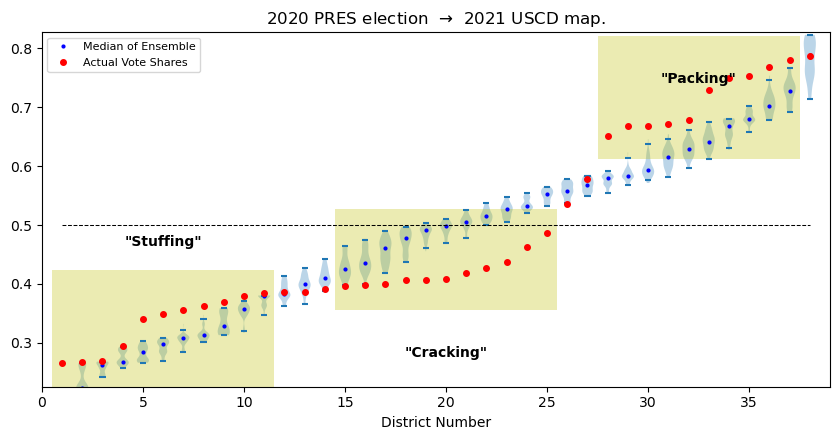

In [ ]:
myfig = vote_vector_ensemble_comps(np.transpose(np.concatenate(([approved],ensemble))), title=r"2020 PRES election  $\to$  2021 USCD map.", 
                           have_actual=True, 
                           comp_plans=False, 
                           comp_plans_vectors=[approved], 
                           comp_plans_names=["Approved Map"],
                           comp_plans_colors=['r'])

Vote Needed for Majority (D-R) -- Ensemble:   0.0256
Seats at 50% Voteshare   (D-R) -- Ensemble:        2
Vote Needed for Majority (D-R) -- Actual:     -0.1566
Seats at 50% Voteshare   (D-R) -- Actual:        -10


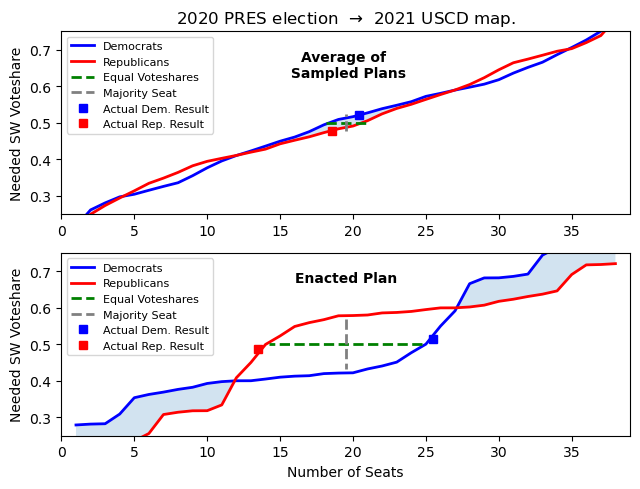

In [ ]:
myfig = seats_votes_ensemble(np.transpose(1-np.concatenate(([approved],ensemble))), r"2020 PRES election  $\to$  2021 USCD map.", have_actual=True)

In [ ]:
myfig = racial_vs_political_deviations()

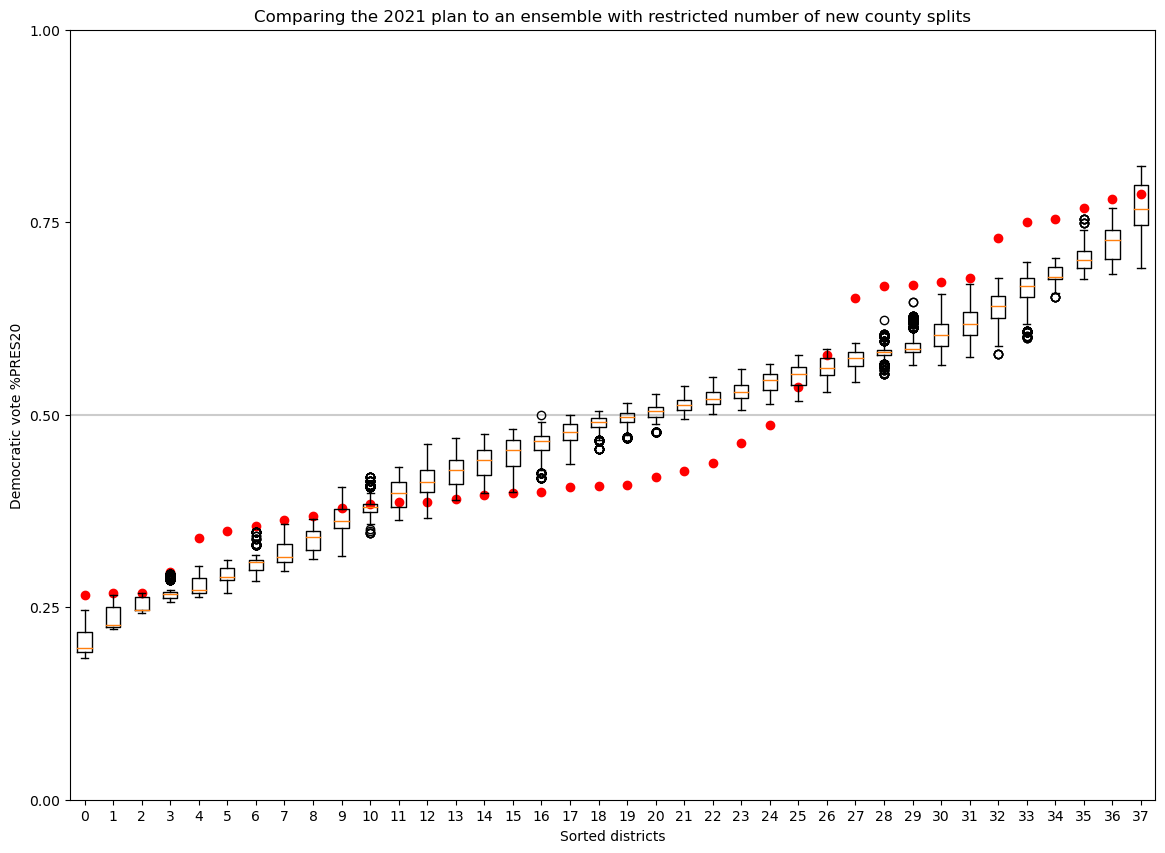

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot

percents.T
plt.plot(approved, "ro")
plt.boxplot(percents,positions=range(0, len(percents[0])))

# Annotate
ax.set_title("Comparing the 2021 plan to an ensemble with restricted number of new county splits")
ax.set_ylabel("Democratic vote %"+el)
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

#If you wish to save the image to file
#plt.savefig("Dem"+el+".png")
#this command outputs a figure and clears the plot
plt.show()

The following code processes minority voting age population as a percent of total voting age population in each district in each partition

In [ ]:
mvap = []
hvap = []
bvap = []
districts_m = []
districts_h = []
districts_b = []

for i in range(0,n):
    #calculates the number of districts in plan i with MVAP proportion
    M = numpy.array(list(NWHT_data["MP"][i]))
    H = numpy.array(list(HVAP_data["HP"][i]))
    B = numpy.array(list(BVAP_data["BP"][i]))
    mvap.append(sorted(M))
    hvap.append(sorted(H))
    bvap.append(sorted(B))
    M = (M+0.5).astype('int')
    #calculates the number of districts in plan i with HVAP proportion > 60%
    H = (H+0.4).astype('int')
    B = (B+0.6).astype('int')
    districts_m.append(sum(M))
    districts_h.append(sum(H))
    districts_b.append(sum(B))

mvap = numpy.asarray(mvap)
hvap = numpy.asarray(hvap)
bvap = numpy.asarray(bvap)
gini = numpy.asarray(gini)
gini.T;


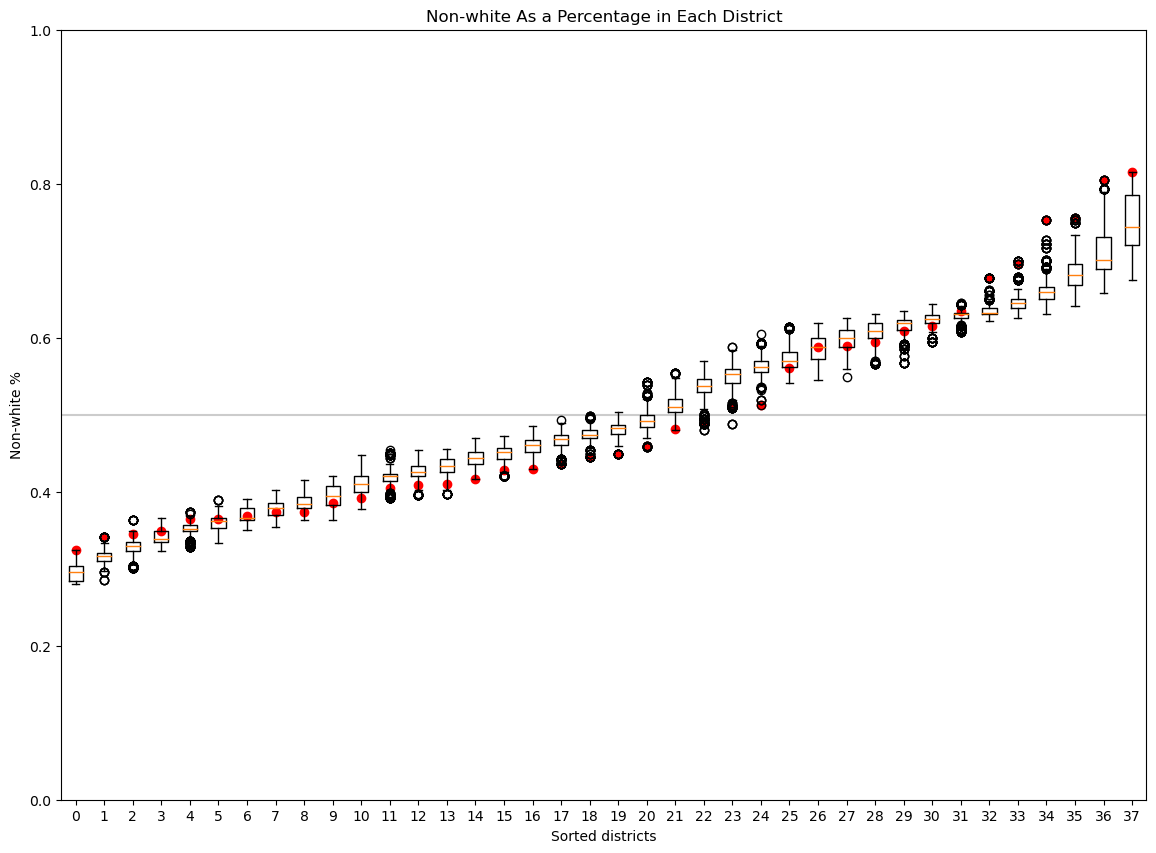

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
mvap.T


plt.plot(mvap[0], "ro")
plt.boxplot(mvap, positions=range(0, len(mvap[0])))

# Annotate
ax.set_title("Non-white As a Percentage in Each District")
ax.set_ylabel("Non-white %")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

#plt.savefig("MVAPboxplot.png")
#this command outputs a figure and clears the plot
plt.show()

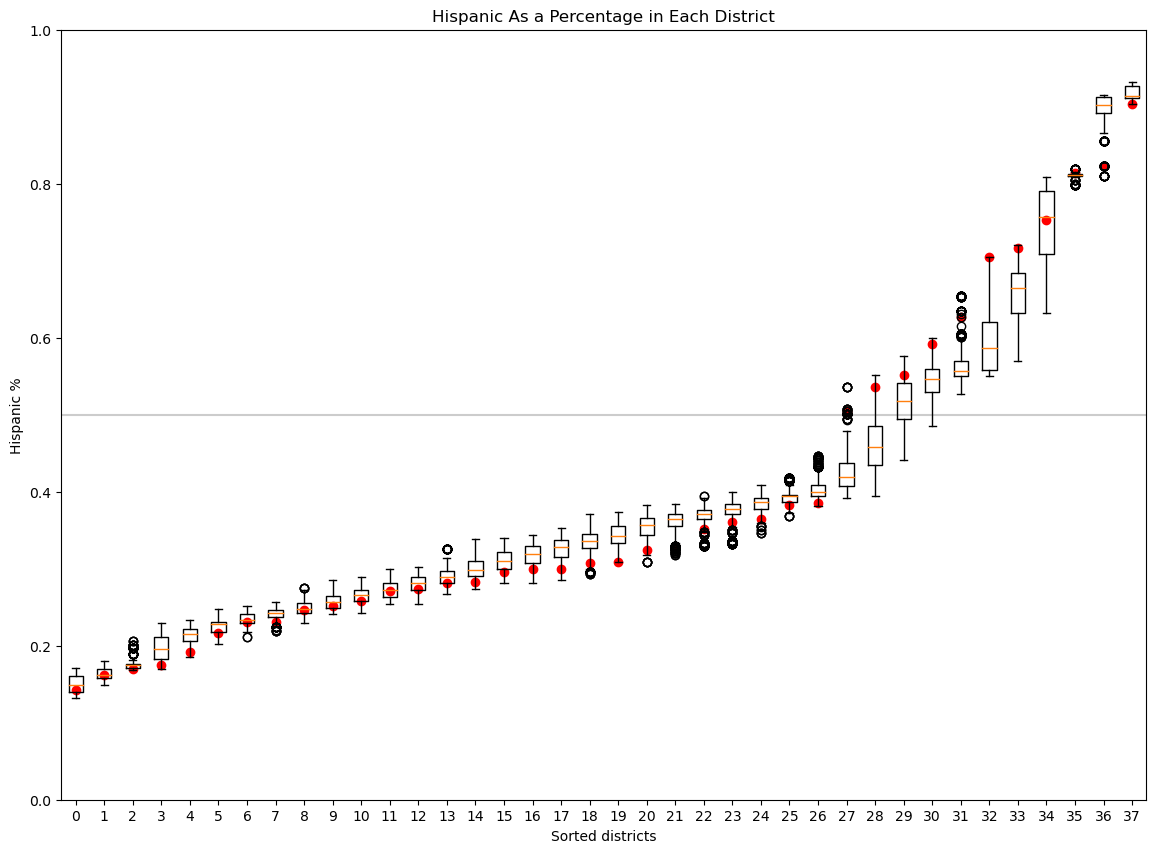

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
mvap.T


plt.plot(hvap[0], "ro")
plt.boxplot(hvap, positions=range(0, len(hvap[0])))

# Annotate
ax.set_title("Hispanic As a Percentage in Each District")
ax.set_ylabel("Hispanic %")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

#plt.savefig("MVAPboxplot.png")
#this command outputs a figure and clears the plot
plt.show()

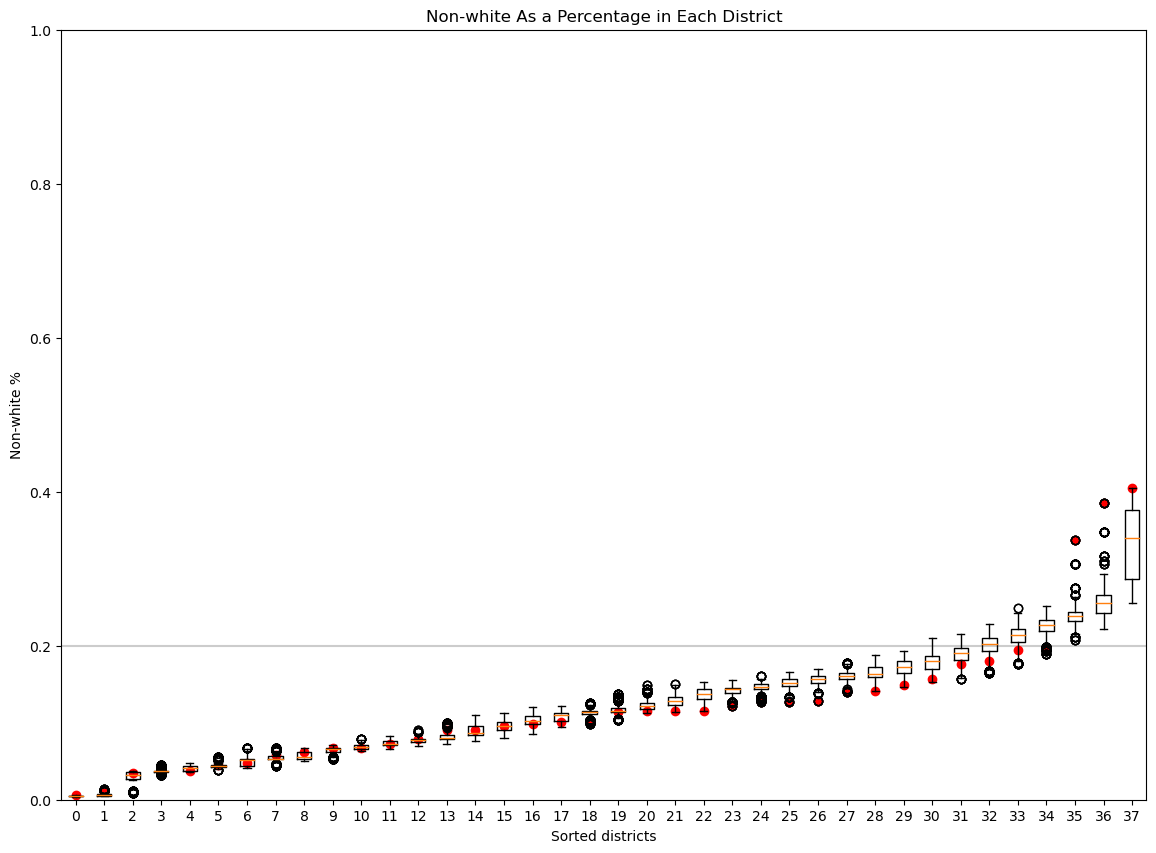

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))

# Draw 50% line
ax.axhline(0.2, color="#cccccc")

# Draw boxplot
mvap.T


plt.plot(bvap[0], "ro")
plt.boxplot(bvap, positions=range(0, len(bvap[0])))

# Annotate
ax.set_title("Non-white As a Percentage in Each District")
ax.set_ylabel("Non-white %")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

#plt.savefig("MVAPboxplot.png")
#this command outputs a figure and clears the plot
plt.show()

## Other statistics

##### We can plot the non-white population

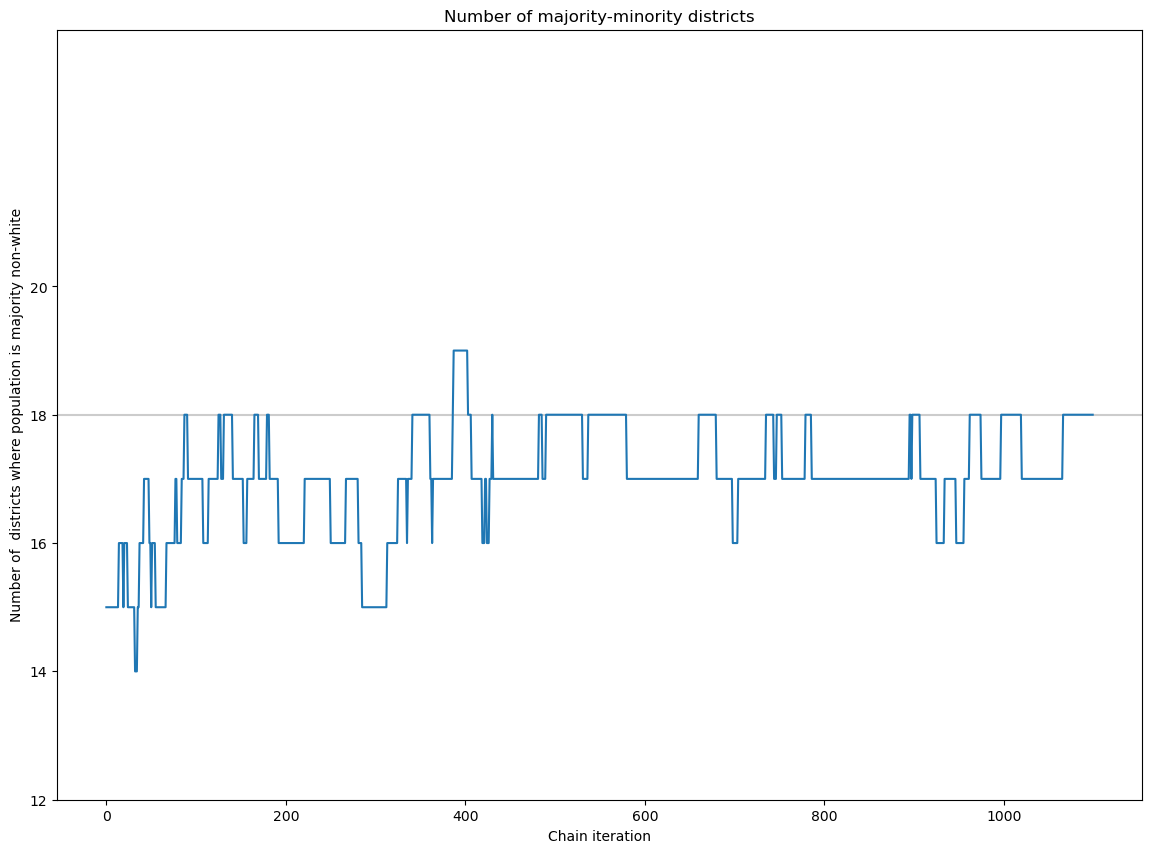

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

# Draw 50% line
ax.axhline(18, color="#cccccc")

# Draw plot
plt.plot(districts_m)

# Annotate
ax.set_title("Number of majority-minority districts")
ax.set_ylabel("Number of  districts where population is majority non-white")
ax.set_xlabel("Chain iteration")
ax.set_ylim(12, 24)
ax.set_yticks([12,14,16,18,20])

#plt.savefig("nonwhiteVAP.png")

#this command outputs a figure and clears the plot
plt.show()

##### We can visualize the Partisan gini scores across the ensembles

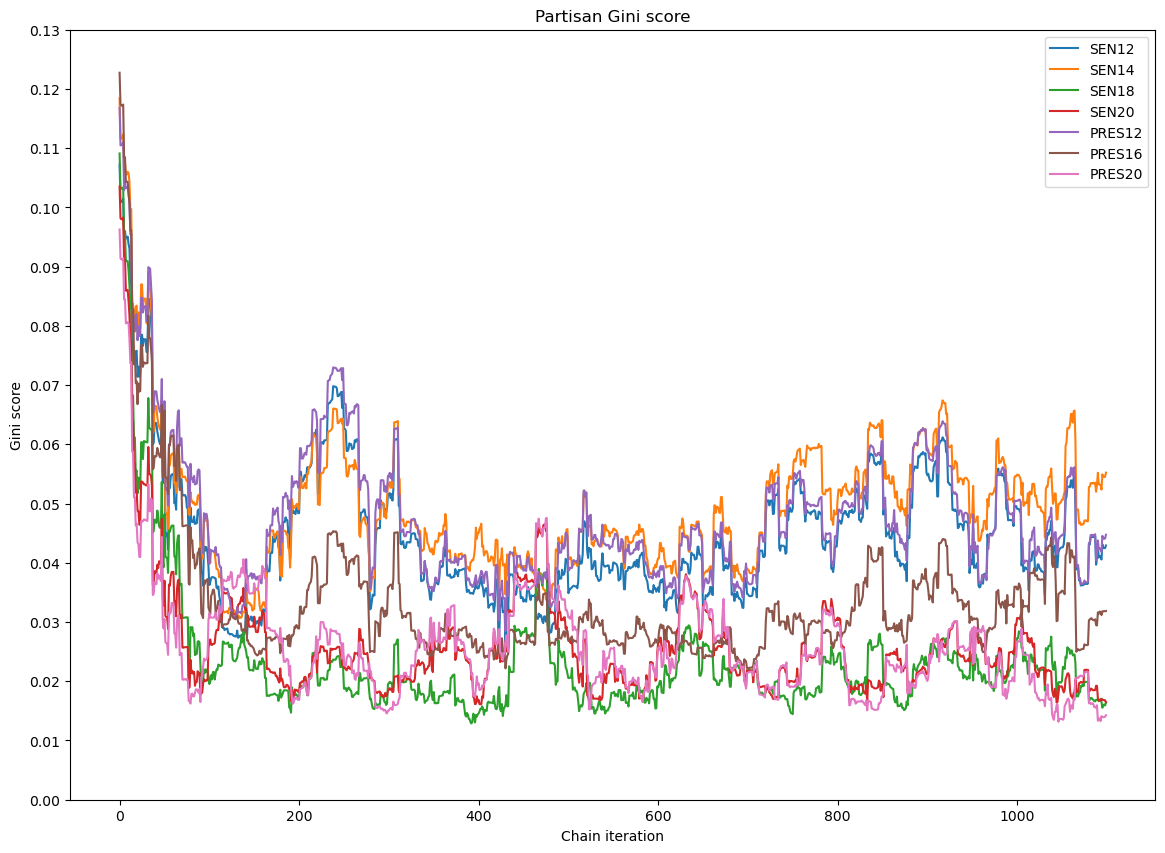

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

# Draw plot
plt.plot(gini)


# Annotate
ax.set_title("Partisan Gini score")
ax.set_ylabel("Gini score")
ax.set_xlabel("Chain iteration")
ax.set_ylim(0,0.1)
ax.set_yticks([0,0.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.11,.12,.13])

ax.legend(['SEN12','SEN14','SEN18','SEN20','PRES12','PRES16','PRES20'])

#plt.savefig("Gini.png")

#this command outputs a figure and clears the plot
plt.show()

We can also visualize the Gini Score as a Histogram to test for Gerrymandering. 

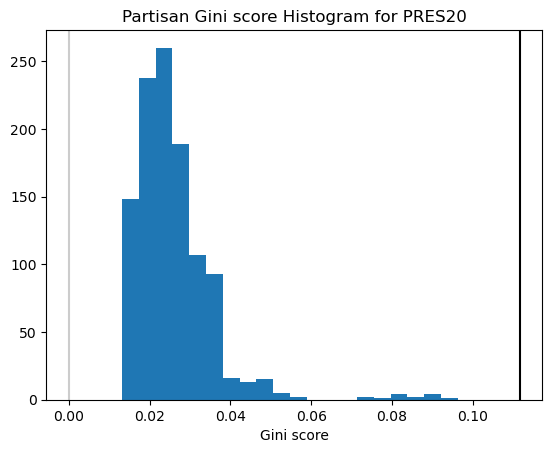

In [ ]:
plt.hist(gini[:,6], bins = 20)


plt.axvline(0, color="#cccccc")

#Plot location of Gini score for congressional map
plt.axvline(gini.item(1,1), color='k')
# Annotate
plt.title("Partisan Gini score Histogram for PRES20")
plt.xlabel("Gini score")
#ax.set_xlabel("Chain iteration")

plt.show()

## There are many more experimenta that can be run with the data. Following are a few examples that you are welcome to use or edit. 

For your reference, here are the available columns in the GeoDataFrame.

In [ ]:
for col in gUSCD.columns:
  print(col)

### Example A - Polsby-Popper

We can calculate the Polsby-Popper value over all districts in a partition. Note that for any given polygon...



In [ ]:
gUSCD.loc[0,'geometry']

...we can calculate its area...



In [ ]:
gUSCD.loc[0,'geometry'].area

... and its perimeter.



In [ ]:
gUSCD.loc[0,'geometry'].length

This means we can calculate its Polsby-Popper score: 
 
This score, which falls between 0 and 1, is often used as a measure of compactness.

In [ ]:
from math import pi

4*pi*gUSCD.loc[0,'geometry'].area/(gUSCD.loc[0,'geometry'].length)**2

In [ ]:
from math import pi
from shapely.ops import unary_union

def PolsbyPopper(partition_col):
  #  We start by making a dictionary of lists of polygons by district.
  polygon_list_dict = {district: [gUSCD.loc[vtd,'geometry'] for vtd in gUSCD[gUSCD[partition_col] == district].index] 
                       for district in districts}
  
  #  We then find the union of each list of polygons to make a single polygon 
  #  for the entire district.
  district_poly_dict = {district:unary_union(polygon_list_dict[district]) for district in districts}
  
  #  We find the Polsby Popper Score of each district polygon.
  PP_dict = {district: 4*pi*district_poly_dict[district].area/(district_poly_dict[district].length)**2 for district in districts}
  return PP_dict

In [ ]:
PolsbyPopper('district')

In [ ]:
# This calculation will take ~10 minutes for 100 ensembles.

PP_in_partitions = []
for i in range(0,n):
  clear_output()
  print('Calculating Polsby Popper for Ensemble ' + str(i)+'.')
  PP_in_partitions.append(list(PolsbyPopper('uscd_'+str(i)).values()))

In [ ]:
#from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

plt.figure(figsize=(20,8))
plt.xlabel('Partition Number')
plt.ylabel('Polsby Popper')
plt.boxplot(PP_in_partitions)
plt.show()

### Example B - Correlation of Two Groups Across Districts

Choose a pair of columns to compare. If the difference between the number of column 1 citizens and column 2 citizens is less than 10% of their average, then we will declare those groups to be similar in that district.

First we will choose two columns to compare. Then we will count the number of districts which are similar in each of our ensembles. In the end, we will have a distribution across all ensembles: how often do these groups have similar representations?


In [ ]:
col_1 = 'hisp_pop'  # Choose a pair of columns to compare!
col_2 = 'nonhisp_pop'

In [ ]:
#  We create a command that sums the given column's population in each district.
def column_pop_by_district(col, partition_col):
  district_pop = {district:0 for district in districts}
  for vtd in gUSCD.index:
    vtd_district = gUSCD.loc[vtd,partition_col]
    district_pop[vtd_district] += gUSCD.loc[vtd][col]
  return district_pop

#  We create a command that compares the difference between the columns' district 
#  populations against 10% of their average population.
def is_correlated(col_1, col_2, partition_col):
  col_1_pop = column_pop_by_district(col_1,partition_col)
  col_2_pop = column_pop_by_district(col_2,partition_col)
  return {district: abs(col_1_pop[district] - col_2_pop[district]) < \
          .1*(col_1_pop[district] + col_2_pop[district])/2 \
          for district in districts}

#  We count the coorrelated districts.
def num_correlated_districts(col_1, col_2, partition_col):
  return list(is_correlated(col_1,col_2,partition_col).values()).count(True)

Now we count the number of correlated districts in each partition.


In [ ]:
#  This will take ~10 minutes.
import time 
#import sys

num_corr_district_list = []
for i in range(0,n):
  clear_output()
  print('Computing correlated districts for Ensemble ' + str(i) + '.')
  num_corr_district_list.append(num_correlated_districts(col_1,col_2,'uscd_'+str(i)))

Now let's plot our data. You can interpret your graph in terms of the degree in which your two groups are situated regionally in similar ways.

In [ ]:
#from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.xlabel('Ensemble Number')
plt.ylabel('Correlated Districts')
plt.scatter(range(n),num_corr_district_list, s = 15, color='orangered')
plt.show()

### Example C - Efficiency Gap
Using the data found in two columns of the GeoDataFrame, the following cells calculate the efficiency gap favoring column 1. The efficiency gap is defined to be the difference between two groups wasted votes, divided by the total number of votes from the two groups. In each district, every vote by the losing party is wasted. The winning party's only wasted votes are those beyond what is necessary to win the district.

In [ ]:
# Choose a pair of columns to compare!
col_1 = 'President_2020_D_Biden_general'
col_2 = 'President_2020_R_Trump_general'

Note that this experiment does not provide information about a presidential election, because votes are aggregated statewide, and not by district.

However, we may consider presidential votes to be a proxy for the vote for a local representative. This then gives insight into how votes are wasted in single-member district elections which comprise the state, taken together.

In [ ]:
from math import floor

#  This counts the votes for each column's citizens in each district.
def votes(col_1, col_2, district_col='district', district_list = districts):
  return {district:
         {col_1: sum([gUSCD.loc[vdt,col_1] for vdt in gUSCD[gUSCD[district_col] == district].index]), 
          col_2: sum([gUSCD.loc[vdt,col_2] for vdt in gUSCD[gUSCD[district_col] == district].index])
          } for district in district_list}

#  We determine the number of votes necessary to have a majority.
def votes_to_win(col_1, col_2, district_col='cd', district_list = districts):
  votes_dict = votes(col_1,col_2,district_col,district_list)
  return {district: floor((votes_dict[district][col_1] + votes_dict[district][col_2])/2)+1 for district in district_list }

#  This calculates the number of wasted votes among each column's citizens.
def wasted_votes(col_1, col_2, district_col = 'cd', district_list = districts):
  votes_dict = votes(col_1, col_2, district_col,district_list)
  to_win_dict = votes_to_win(col_1, col_2, district_col, district_list)
  res = {col_1:0, col_2:0}
  for district in district_list:
    if votes_dict[district][col_1] > votes_dict[district][col_2]:
      res[col_1] += votes_dict[district][col_1] - to_win_dict[district]
      res[col_2] += votes_dict[district][col_2]
    elif votes_dict[district][col_1] < votes_dict[district][col_2]:
      res[col_1] += votes_dict[district][col_1] 
      res[col_2] += votes_dict[district][col_2] - to_win_dict[district]
    else:
      res[col_1] += votes_dict[district][col_1] 
      res[col_2] += votes_dict[district][col_2]
  return res

#  This calculates efficiency gap.
def efficiency_gap(col_1, col_2, district_col = 'cd', district_list = districts):
  total_voters = sum([gUSCD.loc[vtd,col_1] for vtd in gUSCD.index]) + \
  sum([gUSCD.loc[vtd,col_2] for vtd in gUSCD.index])
  
  wasted_dict = wasted_votes(col_1, col_2,district_col, district_list)

  e_gap = (wasted_dict[col_2] - wasted_dict[col_1])/total_voters

  return e_gap

Here is the efficiency gap if the voting districts had been determined by the 9th ensemble.



In [ ]:
efficiency_gap(col_1, col_2, district_col='uscd_9')

Let's make a list of efficiency gaps over all 100 partitions in the GeoDataFrame.



In [ ]:
# This takes ~2 minutes.
efficiency_list = []
for i in range(0,n):
  clear_output()
  print('Calculating efficiency gap for Partition ' + str(i) + '.')
  efficiency_list.append(efficiency_gap(col_1, col_2, 'uscd_'+str(i)))

Let's plot them!

In [ ]:
# from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.xlabel('Partition Number')
plt.ylabel('Efficiency Gap')
plt.bar(range(0,n),efficiency_list, color='blueviolet')
plt.show()